In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon


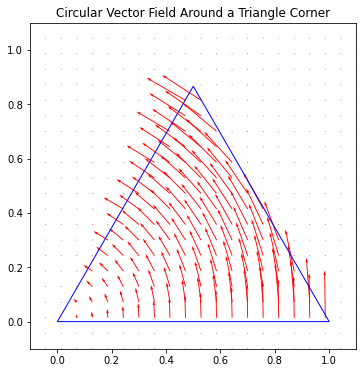

In [2]:

# Define the triangle vertices
triangle_vertices = np.array([[0, 0], [1, 0], [0.5, np.sqrt(3)/2]])

# Define the function to check if a point is inside the triangle
def is_point_in_triangle(point, vertices):
    # Using barycentric coordinates to check if point is inside the triangle
    def sign(p1, p2, p3):
        return (p1[0] - p3[0]) * (p2[1] - p3[1]) - (p2[0] - p3[0]) * (p1[1] - p3[1])

    b1 = sign(point, vertices[0], vertices[1]) < 0.0
    b2 = sign(point, vertices[1], vertices[2]) < 0.0
    b3 = sign(point, vertices[2], vertices[0]) < 0.0

    return ((b1 == b2) and (b2 == b3))

# Define the vector field
def vector_field(x, y, center):
    # Vector from center to point
    dx = x - center[0]
    dy = y - center[1]
    # Distance from center
    dist = np.sqrt(dx**2 + dy**2)
    # Circular vector field (perpendicular to the radius vector)
    return -dy/dist, dx/dist

# Create a grid of points
x, y = np.meshgrid(np.linspace(-0.1, 1.1, 22), np.linspace(-0.1, 1.1, 22))

# Calculate vector components at each point
u, v = np.zeros_like(x), np.zeros_like(y)
center = triangle_vertices[0] # Circular around the first corner of the triangle

for i in range(x.shape[0]):
    for j in range(x.shape[1]):
        if is_point_in_triangle((x[i, j], y[i, j]), triangle_vertices):
            u[i, j], v[i, j] = vector_field(x[i, j], y[i, j], center)
            # Scale vectors with distance to make them longer with increasing distance
            dist = np.sqrt((x[i, j] - center[0])**2 + (y[i, j] - center[1])**2)
            u[i, j] *= dist
            v[i, j] *= dist

# Plotting
plt.figure(figsize=(8, 6))
plt.quiver(x, y, u, v, color='r')
plt.gca().add_patch(Polygon(triangle_vertices, edgecolor='b', facecolor='none'))
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)
plt.gca().set_aspect('equal', adjustable='box')
plt.title('Circular Vector Field Around a Triangle Corner')
plt.show()


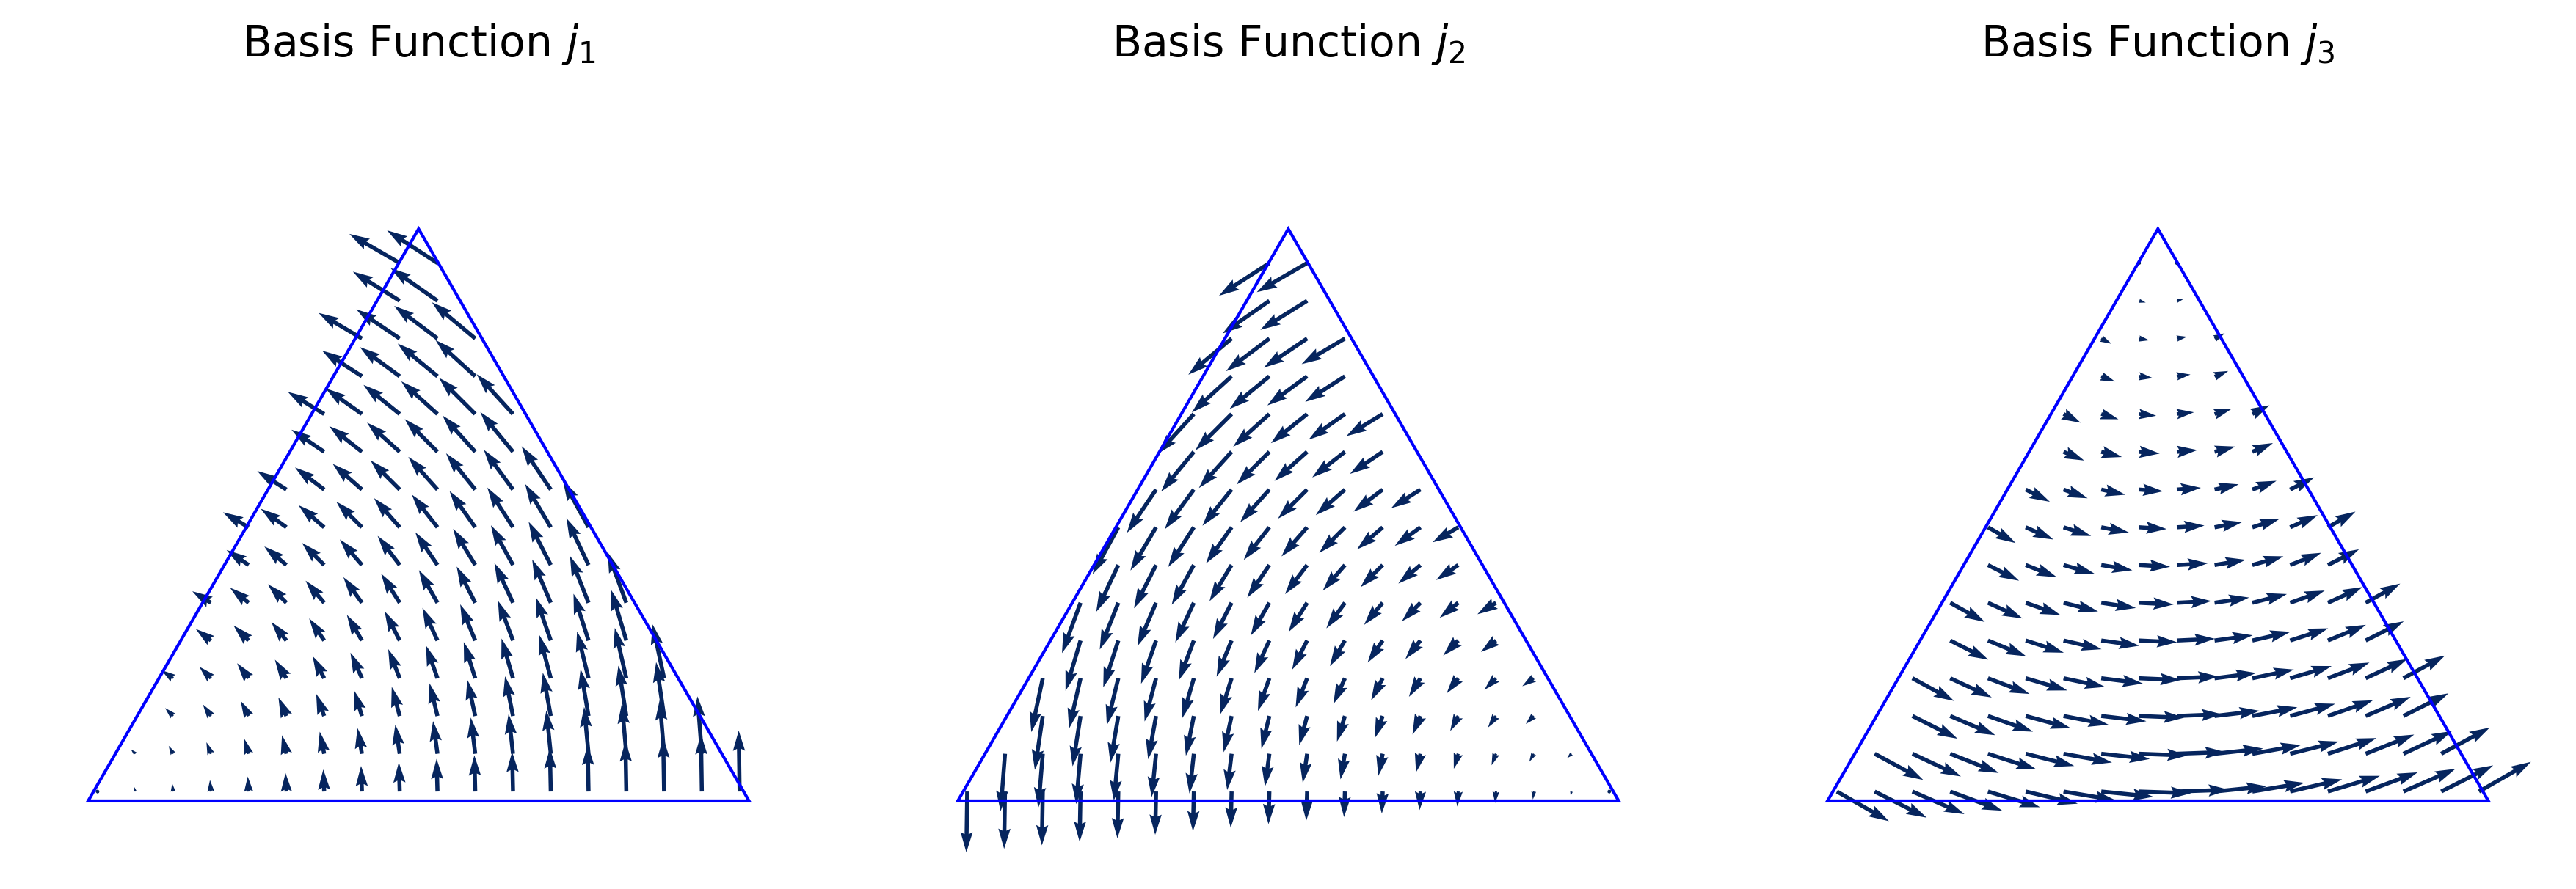

In [3]:
# Adjust the plotting to set the rotation note as a title for each subplot
fig, axes = plt.subplots(1, 3, figsize=(12, 4),dpi = 300)

# For each subplot, set the title to indicate which corner the field rotates about
for ax, center, label in zip(axes, triangle_vertices, ['1', '2', '3']):
    # Calculate vector components at each point
    u, v = np.zeros_like(x), np.zeros_like(y)
    mask = np.zeros_like(x, dtype=bool)  # Mask to track points inside the triangle
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            if is_point_in_triangle((x[i, j], y[i, j]), triangle_vertices):
                mask[i, j] = True  # Mark points inside the triangle
                u[i, j], v[i, j] = vector_field(x[i, j], y[i, j], center)
                # Scale vectors with distance
                dist = np.sqrt((x[i, j] - center[0])**2 + (y[i, j] - center[1])**2)
                u[i, j] *= dist
                v[i, j] *= dist

    # make a uniform background color of #eaeaf2'
    

    # Plotting for each subplot
    ax.quiver(x[mask], y[mask], u[mask], v[mask], color='#06255E')
    ax.add_patch(Polygon(triangle_vertices, edgecolor='b', facecolor='none'))
    ax.set_xlim(-0.1, 1.1)
    ax.set_ylim(-0.1, 1.1)
    ax.set_aspect('equal', adjustable='box')
    ax.axis('off')  # Remove axes

    # Set title to indicate which corner is being rotated about
    ax.set_title(f'Basis Function $j_{label}$', fontsize=14)

plt.tight_layout()
plt.savefig('Figures/vector_FEM.eps', dpi=300, format='eps')
plt.show()



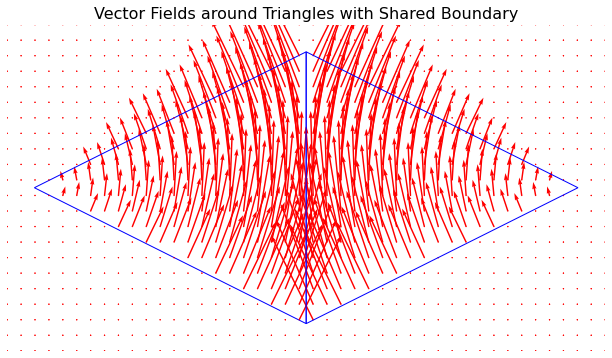

In [4]:
# Define a new vector field function for clockwise and counter-clockwise rotation
def vector_field_clockwise(x, y, center):
    dx = x - center[0]
    dy = y - center[1]
    dist = 0.2*np.sqrt(dx**2 + dy**2)
    return dy/dist, -dx/dist  # Clockwise

def vector_field_counterclockwise(x, y, center):
    dx = x - center[0]
    dy = y - center[1]
    dist = 0.2*np.sqrt(dx**2 + dy**2)
    return -dy/dist, dx/dist  # Counter-clockwise


# Define the new triangles with shared boundary along the y-axis
right_triangle_vertices = np.array([[0, 0], [0, 1], [1, 0.5]])  # Right triangle
left_triangle_vertices = np.array([[0, 0], [0, 1], [-1, 0.5]])  # Left triangle

# Update the grid of points to cover both triangles adequately
x, y = np.meshgrid(np.linspace(-1.1, 1.1, 44), np.linspace(-0.1, 1.1, 22))

# Plotting
plt.figure(figsize=(12, 6))
for vertices, center, vector_func, title in zip([left_triangle_vertices, right_triangle_vertices],
                                                [[-1, 0.5], [1, 0.5]],
                                                [vector_field_counterclockwise, vector_field_clockwise],
                                                ['Counter-clockwise', 'Clockwise']):
    # Calculate vector components at each point
    u, v = np.zeros_like(x), np.zeros_like(y)
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            if is_point_in_triangle((x[i, j], y[i, j]), vertices):
                u[i, j], v[i, j] = vector_func(x[i, j], y[i, j], center)
                # Scale vectors with distance
                dist = np.sqrt((x[i, j] - center[0])**2 + (y[i, j] - center[1])**2)
                u[i, j] *= dist
                v[i, j] *= dist

    # Plotting vectors and triangles
    plt.quiver(x, y, u, v, color='r')
    plt.gca().add_patch(Polygon(vertices, edgecolor='b', facecolor='none', linewidth=1))

plt.xlim(-1.1, 1.1)
plt.ylim(-0.1, 1.1)
plt.gca().set_aspect('equal', adjustable='box')
plt.axis('off')  # Remove axes
plt.title('Vector Fields around Triangles with Shared Boundary', fontsize=16)
plt.show()


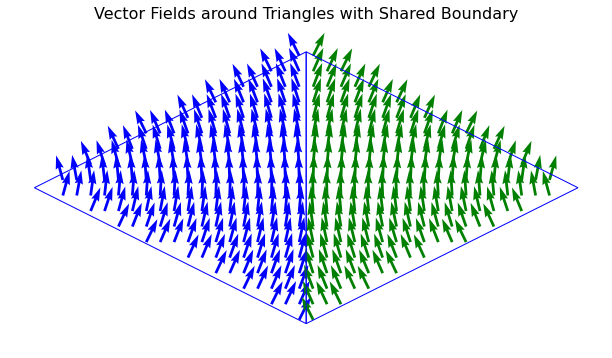

In [5]:
# Adjust the provided code to include distinctive colors for the two vector fields and ensure vectors outside triangles are not shown

# Adjust vector field functions to make vectors smaller as per the new definitions
def vector_field_clockwise(x, y, center):
    dx = x - center[0]
    dy = y - center[1]
    dist = 0.4 * np.sqrt(dx**2 + dy**2)
    return dy / dist, -dx / dist  # Clockwise

def vector_field_counterclockwise(x, y, center):
    dx = x - center[0]
    dy = y - center[1]
    dist = 0.4 * np.sqrt(dx**2 + dy**2)
    return -dy / dist, dx / dist  # Counter-clockwise

# Plotting with adjustments
plt.figure(figsize=(12, 6))
for vertices, center, vector_func, color in zip([left_triangle_vertices, right_triangle_vertices],
                                                [[-1, 0.5], [1, 0.5]],
                                                [vector_field_counterclockwise, vector_field_clockwise],
                                                ['blue', 'green']):  # Distinctive colors
    # Calculate vector components at each point
    u, v = np.zeros_like(x), np.zeros_like(y)
    mask = np.zeros_like(x, dtype=bool)  # Mask to track points inside the triangle
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            if is_point_in_triangle((x[i, j], y[i, j]), vertices):
                mask[i, j] = True  # Mark points inside the triangle
                u[i, j], v[i, j] = vector_func(x[i, j], y[i, j], center)

    # Plotting vectors and triangles only where points are inside the triangles
    plt.quiver(x[mask], y[mask], u[mask], v[mask], color=color)
    plt.gca().add_patch(Polygon(vertices, edgecolor='b', facecolor='none', linewidth=1))

plt.xlim(-1.1, 1.1)
plt.ylim(-0.1, 1.1)
plt.gca().set_aspect('equal', adjustable='box')
plt.axis('off')  # Remove axes
plt.title('Vector Fields around Triangles with Shared Boundary', fontsize=16)
plt.show()


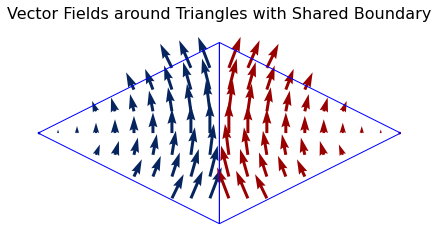

In [6]:
# Adjust vector scaling to ensure vectors vary in length with distance from their respective centers

# Vector field functions with dynamic scaling based on distance
def vector_field_clockwise_dynamic(x, y, center):
    dx = x - center[0]
    dy = y - center[1]
    dist = np.sqrt(dx**2 + dy**2)
    # Scale vector length by distance, ensuring variation
    scale = dist * 0.2 if dist != 0 else 0.1
    return (dy / dist) * scale, (-dx / dist) * scale

def vector_field_counterclockwise_dynamic(x, y, center):
    dx = x - center[0]
    dy = y - center[1]
    dist = np.sqrt(dx**2 + dy**2)
    # Scale vector length by distance, ensuring variation
    scale = dist * 0.2 if dist != 0 else 0.1
    return (-dy / dist) * scale, (dx / dist) * scale

# Reduced density grid
x, y = np.meshgrid(np.linspace(-1.1, 1.1, 22), np.linspace(-0.1, 1.1, 11))

# Plotting with dynamic vector lengths
plt.figure(figsize=(8, 4))
for vertices, center, vector_func, color in zip([left_triangle_vertices, right_triangle_vertices],
                                                [[-1, 0.5], [1, 0.5]],
                                                [vector_field_counterclockwise_dynamic, vector_field_clockwise_dynamic],
                                                ['#06255E', '#990000']):
    # Calculate vector components at each point
    u, v = np.zeros_like(x), np.zeros_like(y)
    mask = np.zeros_like(x, dtype=bool)  # Mask to track points inside the triangle
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            if is_point_in_triangle((x[i, j], y[i, j]), vertices):
                mask[i, j] = True  # Mark points inside the triangle
                u[i, j], v[i, j] = vector_func(x[i, j], y[i, j], center)

    # Plotting vectors and triangles only where points are inside the triangles
    plt.quiver(x[mask], y[mask], u[mask], v[mask], color=color)
    plt.gca().add_patch(Polygon(vertices, edgecolor='b', facecolor='none', linewidth=1))

plt.xlim(-1.1, 1.1)
plt.ylim(-0.1, 1.1)
plt.gca().set_aspect('equal', adjustable='box')
plt.axis('off')  # Remove axes
plt.title('Vector Fields around Triangles with Shared Boundary', fontsize=16)
plt.savefig('Figures/curl_conforming.eps', dpi=300, format='eps')

plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


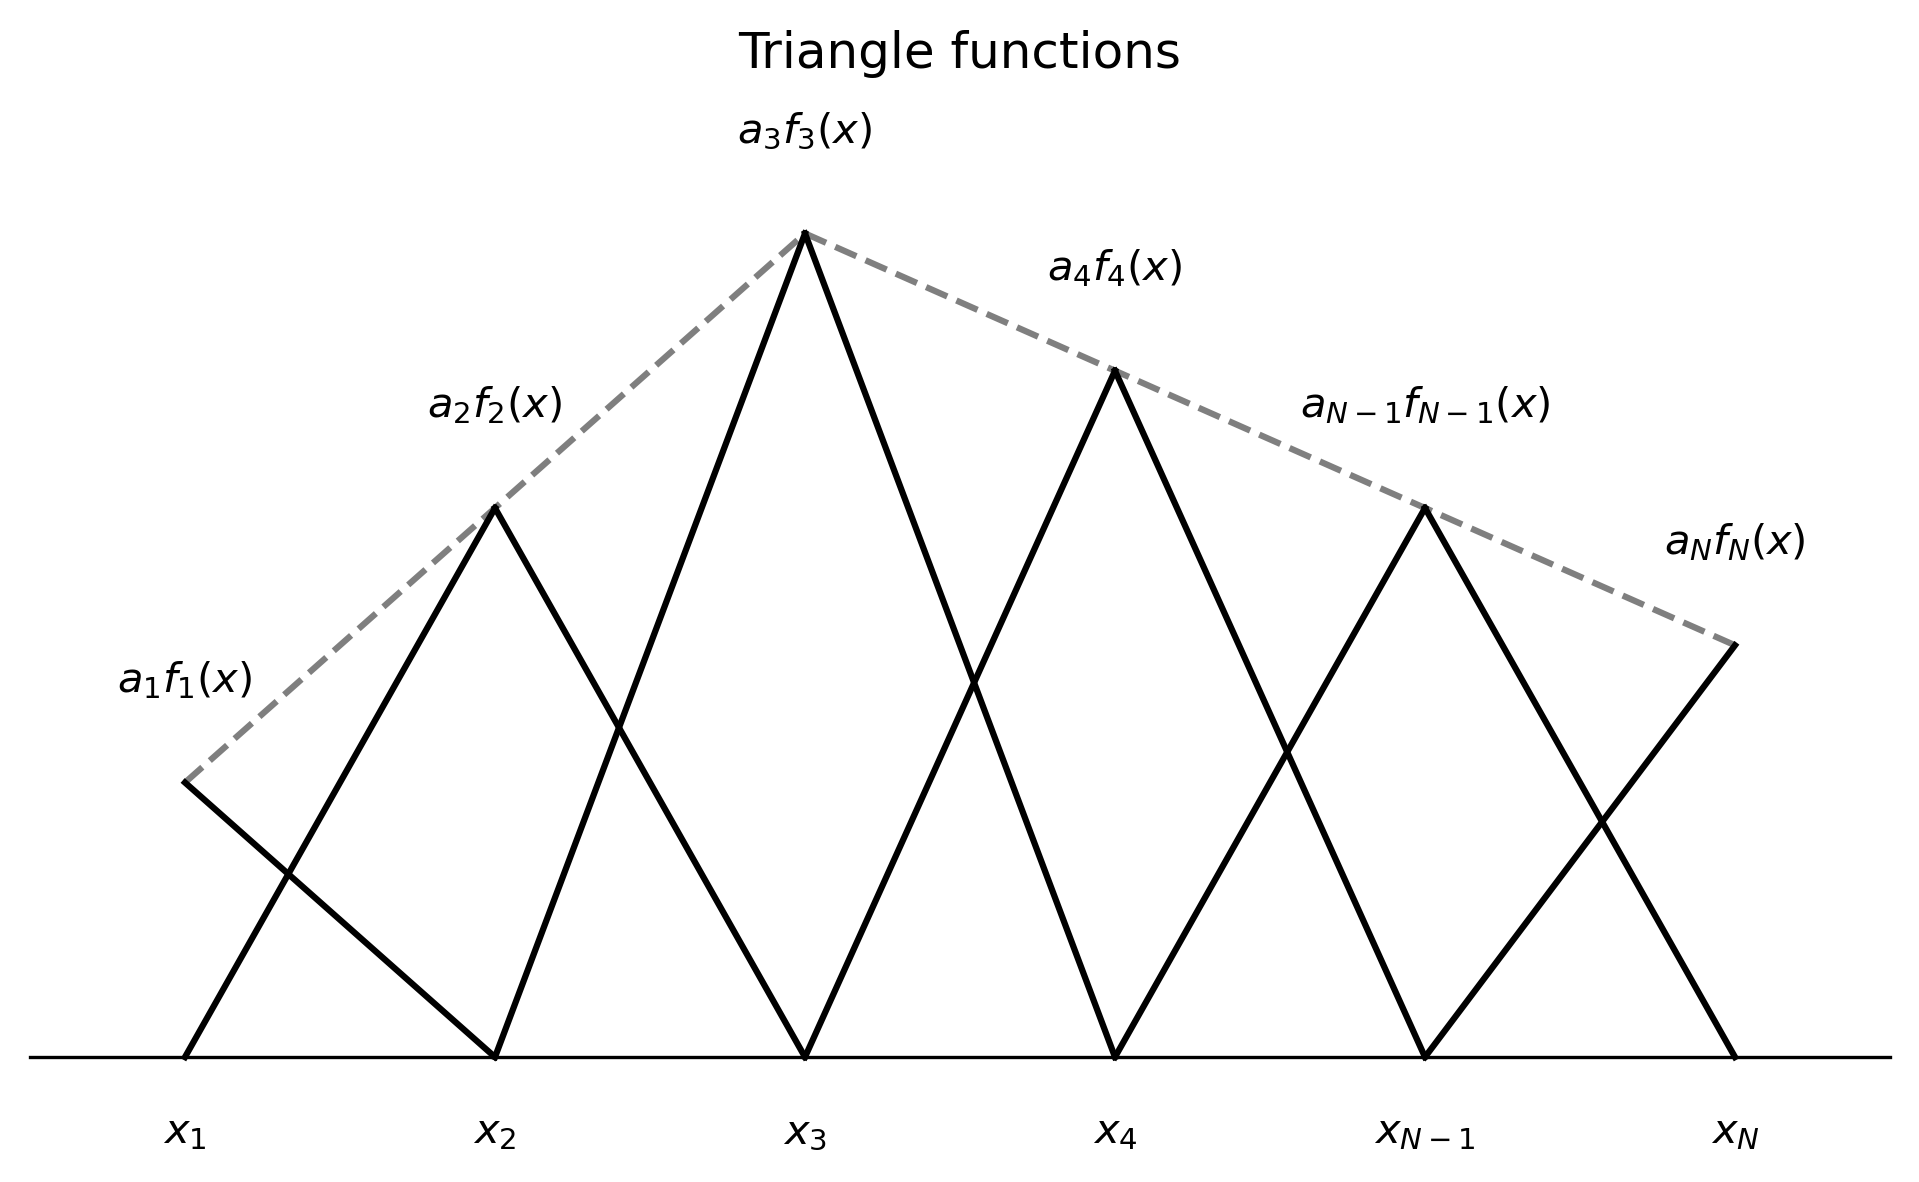

In [7]:
# Define the positions for the x-ticks and the coefficients for the top points
x_ticks = [1, 2, 3, 4, 5, 6]  # These will be x_1 to x_N
coefficients = [1, 2, 3, 2.5, 2, 1.5]  # Arbitrary coefficients for the top points

# Create the plot for the triangle functions with corrected x-tick labels for x_{N-1} and x_N
plt.figure(figsize=(8,4), dpi = 300)

# Plot the triangles for all x-ticks
for i in range(len(x_ticks)):
    if i == 0:  # First top point, only a line down to x2
        plt.plot([x_ticks[i], x_ticks[i+1]], [coefficients[i], 0], 'k')
    elif i == len(x_ticks) - 1:  # Last top point, only a line down to X_{N-1}
        plt.plot([x_ticks[i], x_ticks[i-1]], [coefficients[i], 0], 'k')
    else:  # Top points in between
        plt.plot([x_ticks[i], x_ticks[i-1]], [coefficients[i], 0], 'k')  # Line to previous x-tick
        plt.plot([x_ticks[i], x_ticks[i+1]], [coefficients[i], 0], 'k')  # Line to next x-tick

# Connect all top points with a dashed line
plt.plot(x_ticks, coefficients, 'k--', alpha=0.5)

# Annotate the top points with the correct labeling for a_{N-1} and a_N, adjusted for height
annotation_offset = max(coefficients) * 0.1  # Offset annotations by 10% of the max height for clarity

for i, (x, y) in enumerate(zip(x_ticks, coefficients)):
    if i == len(x_ticks) - 2:
        plt.text(x, y + annotation_offset, f'$a_{{N-1}}f_{{N-1}}(x)$', horizontalalignment='center', verticalalignment='bottom')
    elif i == len(x_ticks) - 1:
        plt.text(x, y + annotation_offset, f'$a_Nf_N(x)$', horizontalalignment='center', verticalalignment='bottom')
    else:
        plt.text(x, y + annotation_offset, f'$a_{i+1}f_{i+1}(x)$', horizontalalignment='center', verticalalignment='bottom')

# Set the x-axis limits
plt.xlim(0.5, x_ticks[-1] + 0.5)

# Annotate the x-axis with corrected labels for x_{N-1} and x_N
for i, x in enumerate(x_ticks):
    if i == len(x_ticks) - 2:
        plt.text(x, -0.2, f'$x_{{N-1}}$', horizontalalignment='center', verticalalignment='top')
    elif i == len(x_ticks) - 1:
        plt.text(x, -0.2, f'$x_N$', horizontalalignment='center', verticalalignment='top')
    else:
        plt.text(x, -0.2, f'$x_{i+1}$', horizontalalignment='center', verticalalignment='top')

# Remove y-axis completely
plt.gca().spines['left'].set_color('none')
plt.gca().yaxis.set_ticks_position('none')
plt.gca().yaxis.set_visible(False)

# Add x-axis and hide the right and top spines
plt.gca().spines['bottom'].set_position('zero')
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')

# Remove x-ticks
plt.xticks([])

# Add title with adjusted position
plt.title('Triangle functions', pad=30)  # Increase the pad to move the title up
plt.savefig('Figures/hat_basis.eps', dpi=300, format='eps')

# Show the plot
plt.show()




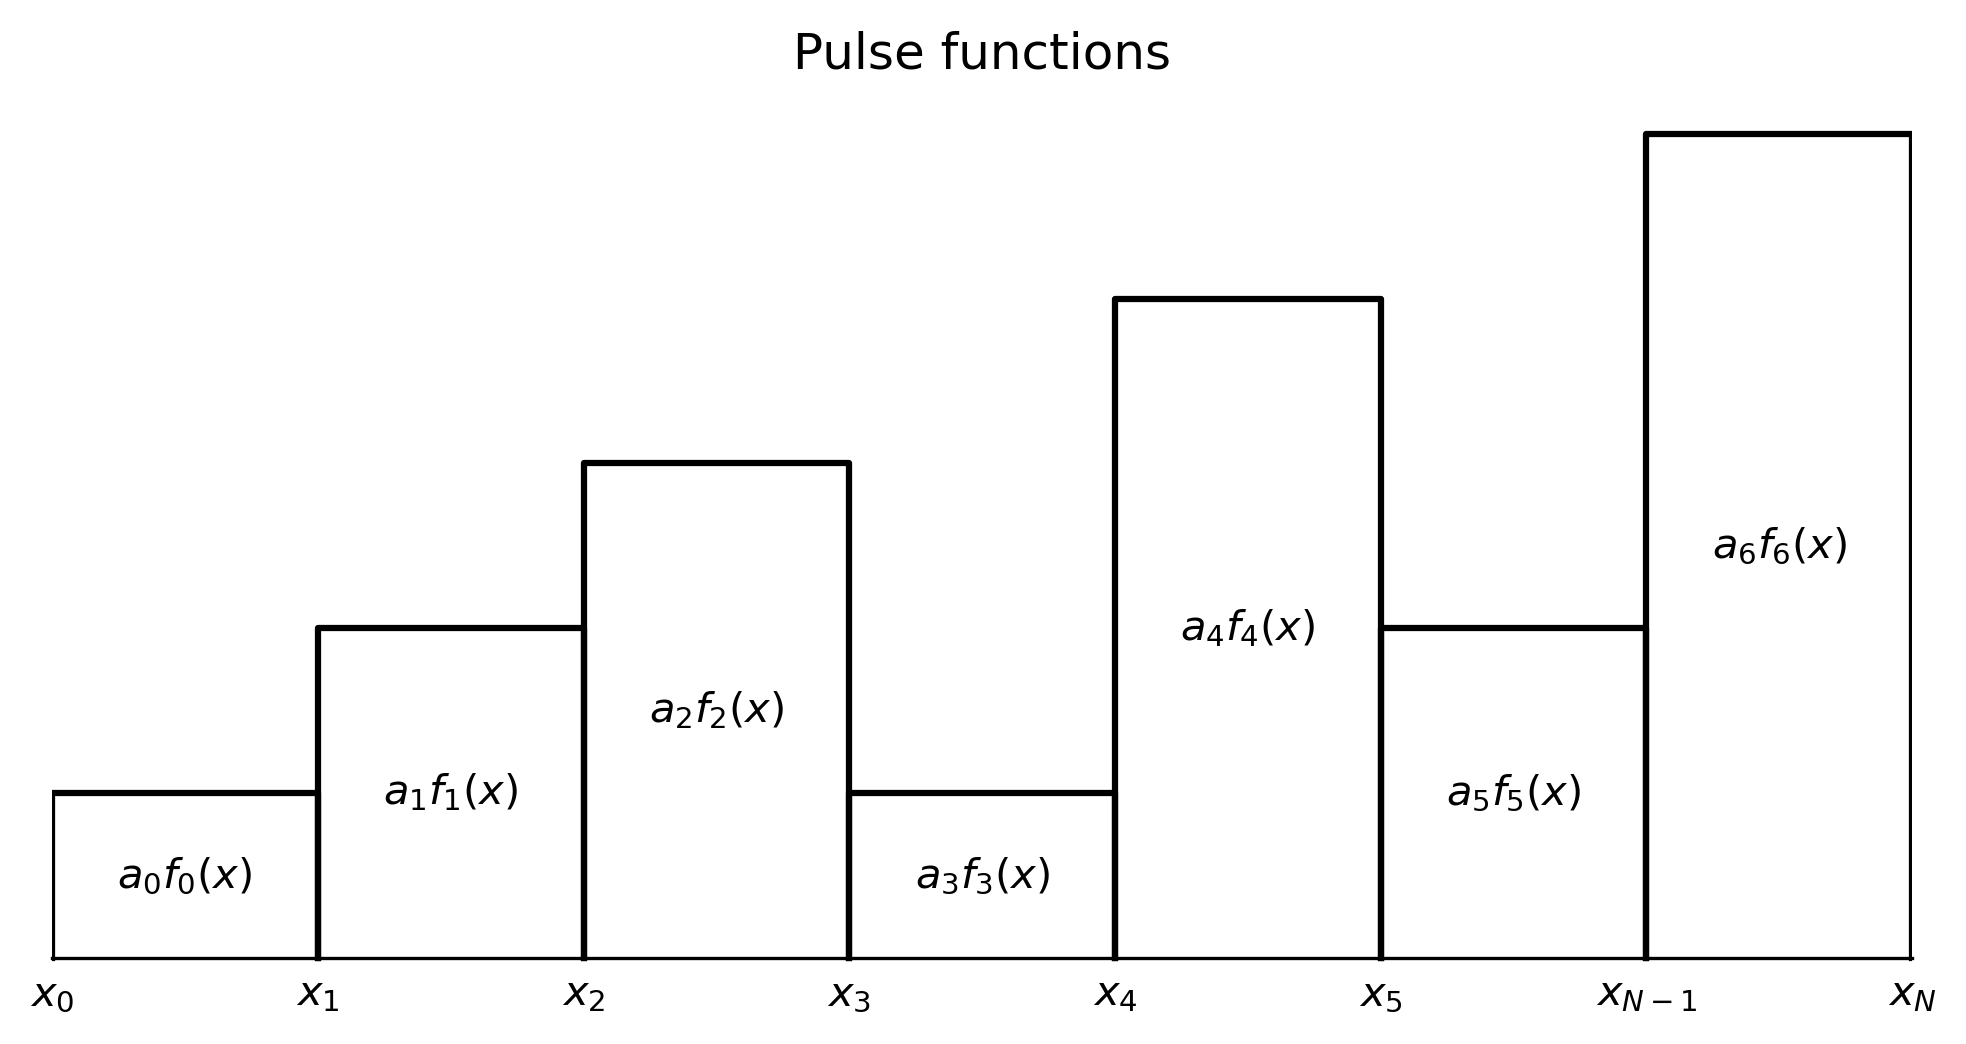

In [8]:
# Update the plot to place the pulses directly on the x-axis
# Update coefficients and segments to include an additional block

coefficients = [1, 2, 3, 1, 4, 2, 5]  # Added an additional coefficient for the new block

segment_starts = [0, 1, 2, 3, 4, 5, 6]  # Updated segment starts

segment_ends = [1, 2, 3, 4, 5, 6, 7]  # Added a new segment end for x_N

pulse_heights = [coeff * 1 for coeff in coefficients]  # f(x) = 1 for simplicity



# Create the plot again with the pulses on the x-axis
plt.figure(figsize=(8, 4), dpi = 300)

# Plot each pulse function with the new configuration
for i in range(len(coefficients)):
    plt.plot([segment_starts[i], segment_starts[i], segment_ends[i], segment_ends[i]],
             [0, pulse_heights[i], pulse_heights[i], 0], 'k')

    # Annotate the pulse functions with correct indices starting from 0
    plt.text((segment_starts[i] + segment_ends[i]) / 2, pulse_heights[i] / 2, f'$a_{i}f_{i}(x)$',
             horizontalalignment='center', verticalalignment='center')

# Set the x-axis limits to include the last segment
plt.xlim(segment_starts[0], segment_ends[-1])

# Annotate the x-axis with segment boundaries including x0 and up to x_{N-2}
for i in range(len(segment_starts) - 1):
    plt.text(segment_starts[i], -0.1, f'$x_{i}$', horizontalalignment='center', verticalalignment='top')

# Annotate the last two segment boundaries with x_{N-1} and x_N
plt.text(segment_starts[-1], -0.1, f'$x_{{N-1}}$', horizontalalignment='center', verticalalignment='top')
plt.text(segment_ends[-1], -0.1, f'$x_N$', horizontalalignment='center', verticalalignment='top')

# Remove y-axis completely
plt.gca().spines['left'].set_color('none')
plt.gca().yaxis.set_ticks_position('none')
plt.gca().yaxis.set_visible(False)

# Add x-axis and hide the right and top spines
plt.gca().spines['bottom'].set_position('zero')  # Move the bottom spine to y=0
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')

# Remove x-ticks
plt.xticks([])

# Add title
plt.title('Pulse functions')
plt.savefig('Figures/pulse_basis.eps', dpi=300, format='eps')

# Show the plot
plt.show()


In [9]:
import numpy as np
import matplotlib.pyplot as plt

def divide_quad(nodes) :
    """Splits a quadrilateral into four by computing its center and midpoints of edges

    Parameters
    ----------
    nodes : list of 4 nodes
    
    Returns
    -------
    list of 5 nodes
    """
    p0, p1, p2, p3 = nodes # corners

    pc = 0.25*(p0+p1+p2+p3) # center point

    p01 = 0.5*(p0+p1) # midpoints
    p12 = 0.5*(p1+p2) 
    p23 = 0.5*(p2+p3) 
    p30 = 0.5*(p3+p0)

    return [pc, p01, p12, p23, p30] 



def divide_quads(nodes, quads, boundary_nodes, a=1.0) :
    """ Refines a mesh of quadrilaterals by splitting each quadrilateral into four
        and projecting boundary nodes onto the circle of radius a centered at the origin
        
        Parameters
        ----------
        nodes : list of nodes
        
        quads : list of quadrilaterals
        
        boundary_nodes : list of boundary nodes
        
        a : radius of circle
        
        Returns
        -------
        nodes : list of nodes
        
        quads : list of quadrilaterals
        
        boundary_nodes : list of boundary nodes
    """
    # project boundary point onto circle
    def p2circle(p,a) :
        """ projects points onto a circle

        """
        return a*p/np.linalg.norm(p) # project onto circle

    no_nodes = len(nodes) 

    new_quads = np.array([],dtype=int).reshape(0,4) 

    for q in quads: 
        
        p = divide_quad(nodes[q]) 

        nodes = np.append(nodes,p,axis=0) 

        # new points
        pc, p01, p12, p23, p30 = p 

        # old quad
        i0, i1, i2, i3 = q 
        ic = no_nodes
        i01 = ic+1
        i12 = ic+2
        i23 = ic+3
        i30 = ic+4

        new_quads = np.append(new_quads, [[ic, i30, i0, i01], 
                                          [ic, i01, i1, i12],
                                          [ic, i12, i2, i23],
                                          [ic, i23, i3, i30]], axis=0)
                              
        if (i0 in boundary_nodes and i1 in boundary_nodes) :
            boundary_nodes = np.append(boundary_nodes, i01)
            nodes[i01] = p2circle(nodes[i01],a)

        if (i1 in boundary_nodes and i2 in boundary_nodes) :
            boundary_nodes = np.append(boundary_nodes, i12)
            nodes[i12] = p2circle(nodes[i12],a)

        if (i2 in boundary_nodes and i3 in boundary_nodes) :
            boundary_nodes = np.append(boundary_nodes, i23)
            nodes[i23] = p2circle(nodes[i23],a)

        if (i3 in boundary_nodes and i0 in boundary_nodes) :
            boundary_nodes = np.append(boundary_nodes, i30)
            nodes[i30] = p2circle(nodes[i30],a)

        no_nodes = no_nodes+5

    return nodes, new_quads, boundary_nodes

def disk_quad(n,a=1.0) :

    """ Generates a mesh of a disk using quadrilaterals
    n: number of refinement levels
    a: disk radius
    """

    M_1_SQRT_2 = 0.707106781186547524400844362104849039

    c = a * M_1_SQRT_2
    
    # define initial mesh
    nodes = [[ c, c],
             [-c, c],
             [-c,-c],
             [ c,-c]]
    
    quads = [[0,1,2,3]]
    
    boundary_nodes = [0,1,2,3]
    
    nodes = np.array(nodes)
    quads = np.array(quads)
    boundary_nodes = np.array(boundary_nodes)

    # refine mesh
    for l in range(n):
        nodes, quads, boundary_nodes = divide_quads(nodes, quads, boundary_nodes, a)

    return nodes, quads, boundary_nodes

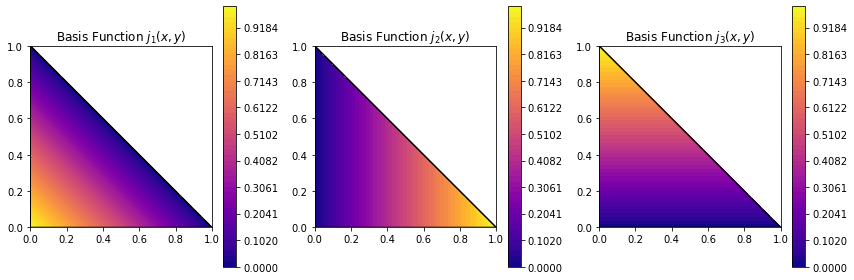

In [10]:
# Correcting the plotting for phi_2 and phi_3 functions to ensure they represent the triangular domain correctly
# Let's try to plot the P1 Lagrange functions again, ensuring the visualization is accurate for all three functions.

# Define the vertices of the triangle again
vertices = np.array([[0, 0], [1, 0], [0, 1]])

# Re-define the piecewise linear basis functions (P1 Lagrange functions)
def phi_1(x, y):
    return 1 - x - y

def phi_2(x, y):
    return x

def phi_3(x, y):
    return y
# Define the triangle vertices
triangle = np.array([[0, 0], [1, 0], [0, 1]])

# Create a grid of points
x = np.linspace(0, 1, 100)
y = np.linspace(0, 1, 100)
X, Y = np.meshgrid(x, y)

# Initialize Z matrices for the basis functions
Z1 = np.full(X.shape, np.nan)
Z2 = np.full(X.shape, np.nan)
Z3 = np.full(X.shape, np.nan)

# Evaluate the basis functions only inside the triangle
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        if X[i, j] + Y[i, j] <= 1:
            Z1[i, j] = phi_1(X[i, j], Y[i, j])
            Z2[i, j] = phi_2(X[i, j], Y[i, j])
            Z3[i, j] = phi_3(X[i, j], Y[i, j])

# Create the plots for the basis functions
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# Plot phi_1
cp1 = axs[0].contourf(X, Y, Z1, levels=np.linspace(0, 1, 50), cmap='plasma')
fig.colorbar(cp1, ax=axs[0])
axs[0].set_title('Basis Function $j_1(x,y)$')
axs[0].plot(*triangle[[0, 1, 2, 0],:].T, 'k-') # outline the triangle

# Plot phi_2
cp2 = axs[1].contourf(X, Y, Z2, levels=np.linspace(0, 1, 50), cmap='plasma')
fig.colorbar(cp2, ax=axs[1])
axs[1].set_title('Basis Function $j_2(x,y)$')
axs[1].plot(*triangle[[0, 1, 2, 0],:].T, 'k-') # outline the triangle

# Plot phi_3
cp3 = axs[2].contourf(X, Y, Z3, levels=np.linspace(0, 1, 50), cmap='plasma')
fig.colorbar(cp3, ax=axs[2])
axs[2].set_title('Basis Function $j_3(x,y)$')
axs[2].plot(*triangle[[0, 1, 2, 0],:].T, 'k-') # outline the triangle

# Adjusting the plot limits and aspect
for ax in axs:
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])
    ax.set_aspect('equal')

plt.tight_layout()
plt.savefig('Figures/nodal_basis_FEM.eps', dpi=300, format='eps')
plt.show()


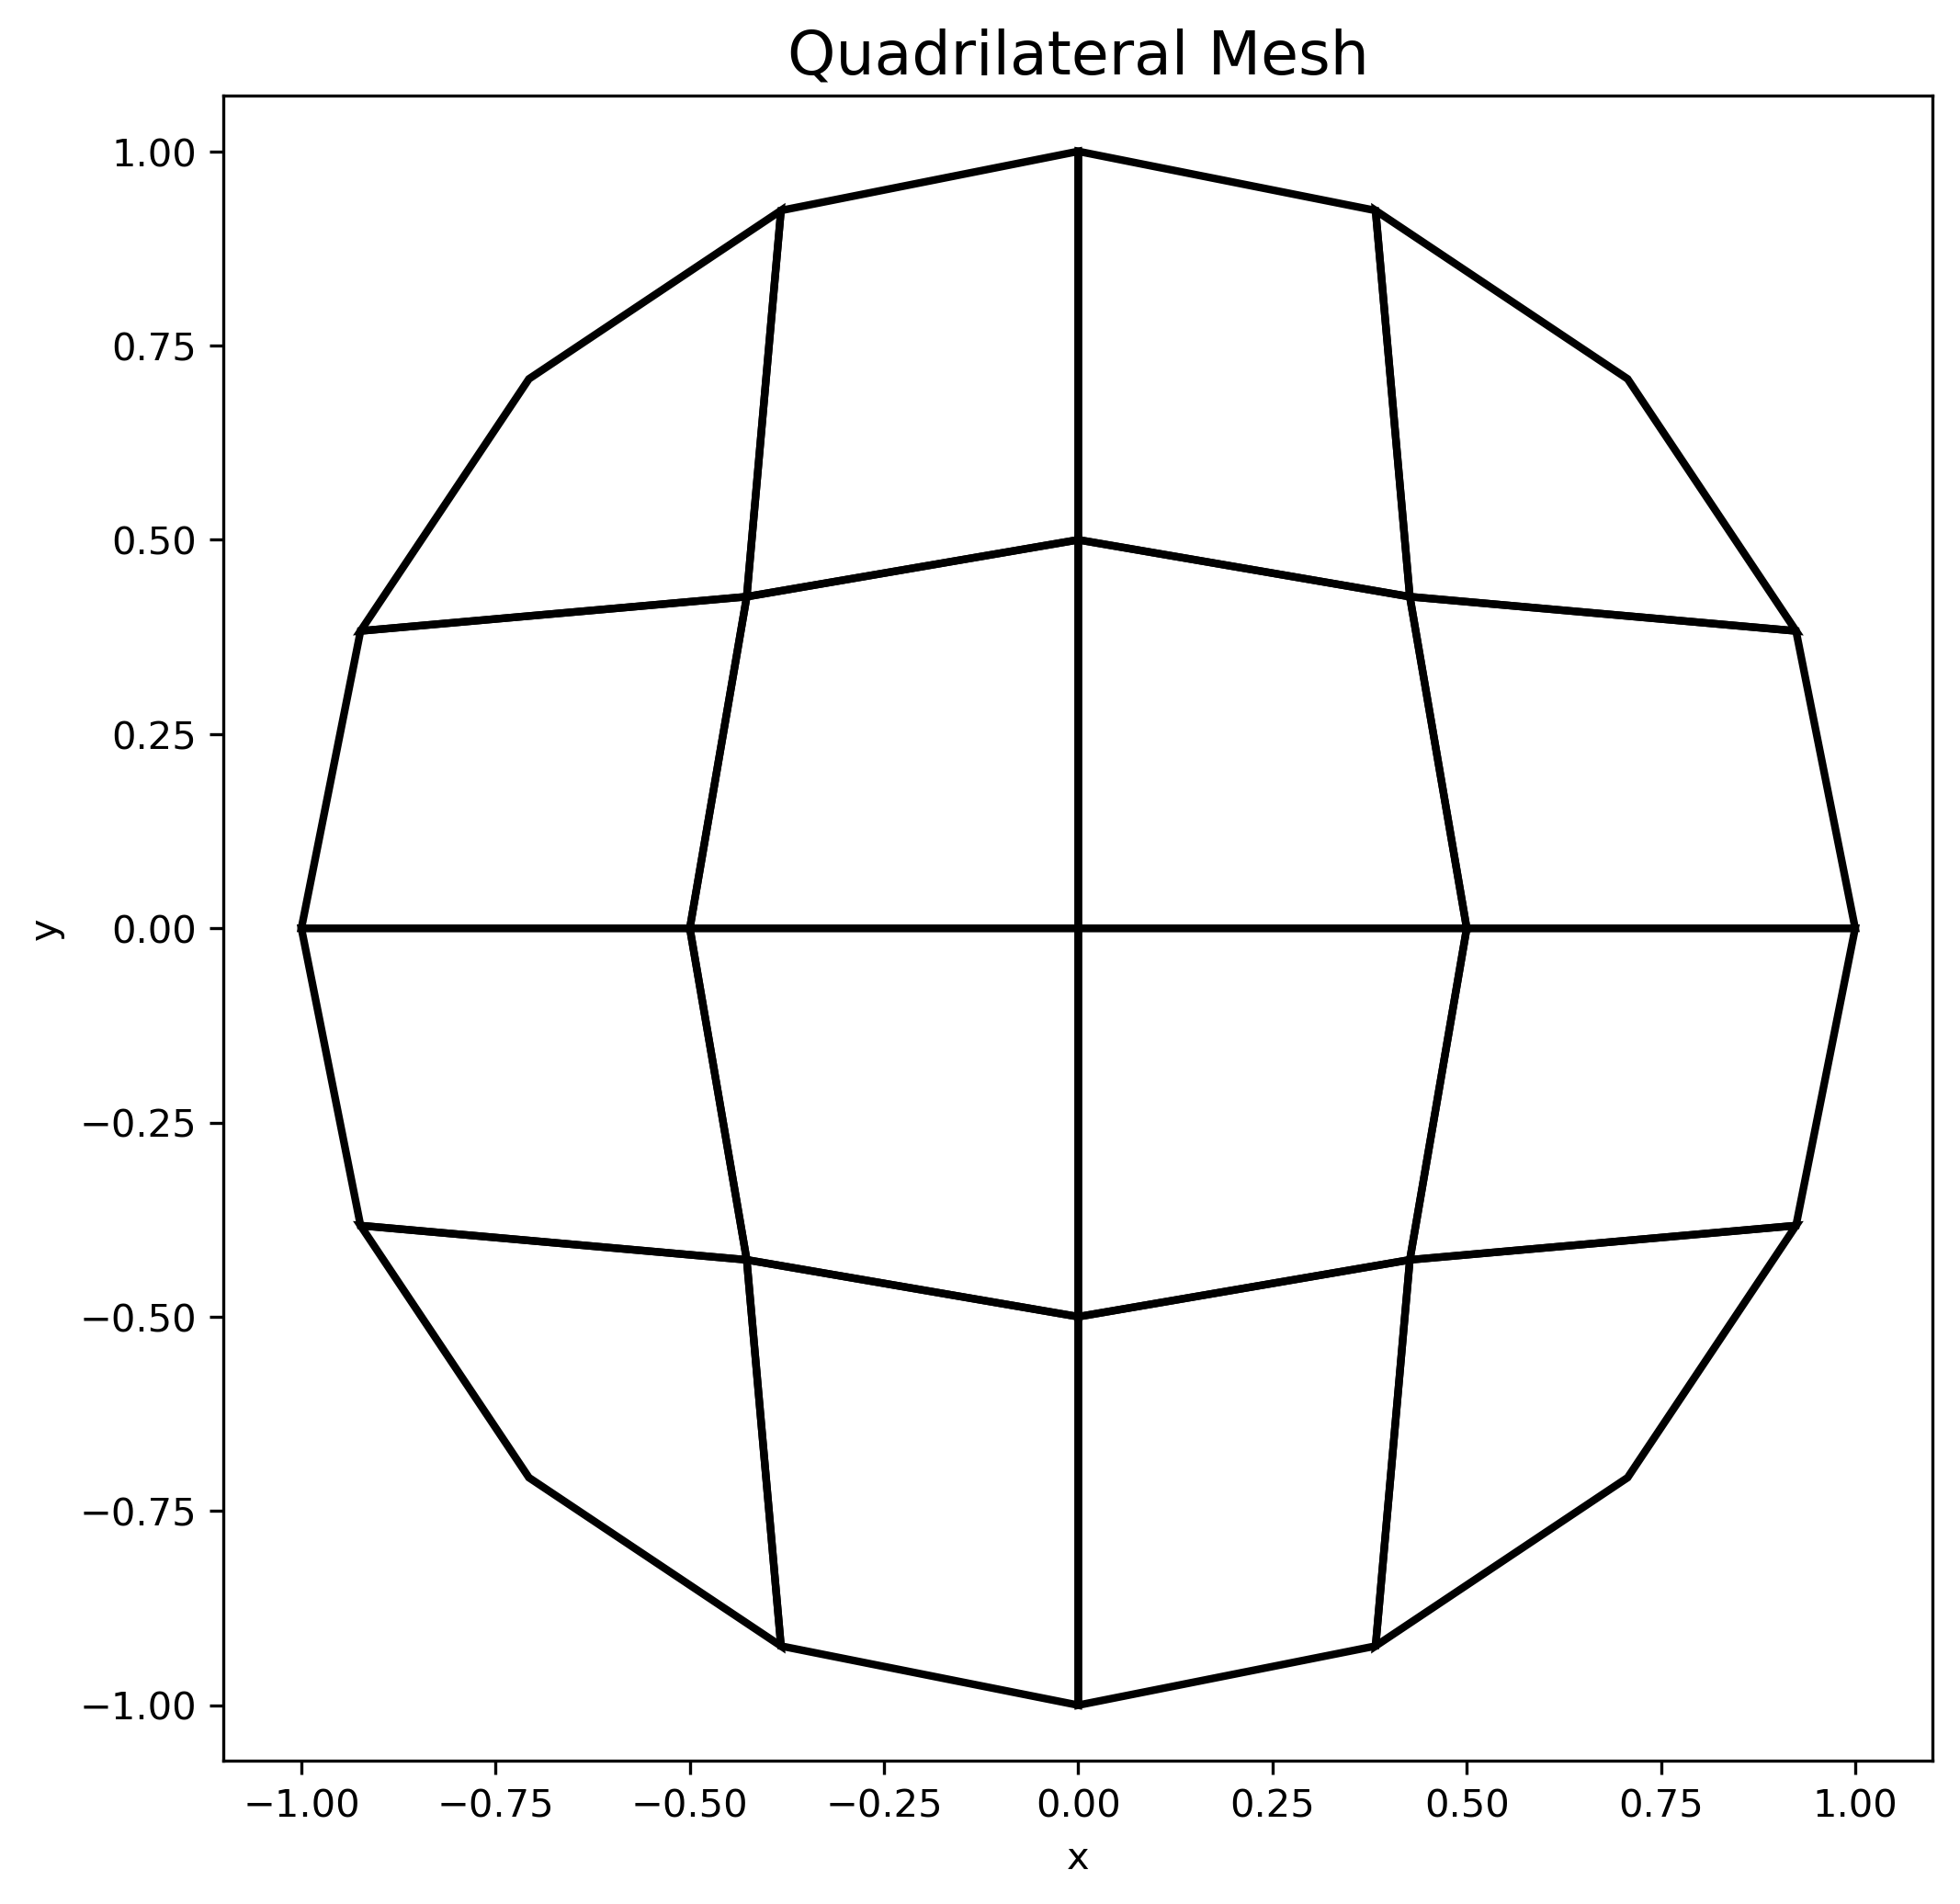

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def plot_quads(nodes, quads):
    """Plots quadrilaterals.

    Parameters
    ----------
    nodes : list of nodes
        Each node is a tuple or list of x and y coordinates: (x, y).

    quads : list of quadrilaterals
        Each quadrilateral is defined by indices of nodes that form its vertices.

    Returns
    -------
    None
        A figure with quadrilaterals plotted.
    """
    # Create figure and axes
    fig, ax = plt.subplots(figsize=(8, 8), dpi=300)

    for q in quads:
        x = [nodes[q[i]][0] for i in range(len(q))]
        y = [nodes[q[i]][1] for i in range(len(q))]

        # Use linewidth=2 for the edges of the quadrilaterals
        ax.fill(x, y, edgecolor='black', fill=False, linewidth=2)

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_aspect('equal')
    ax.axis('equal')
    ax.set_title('Quadrilateral Mesh', fontsize=16)

    plt.show()



nodes, quads, boundary_nodes = disk_quad(2, a=1.0)

plot_quads(nodes,quads)



In [12]:
import matplotlib.pyplot as plt
import matplotlib.tri as mtri
import xml.etree.ElementTree as ET

import matplotlib.pyplot as plt
import numpy as np
from dolfin import *

from dolfin import Mesh
import matplotlib.pyplot as plt

def plot_mesh_from_xml(xml_file_path, ax):
    # Load the mesh using FEniCS
    mesh = Mesh(xml_file_path)
    
    # Extract vertices and cells (triangles in this case)
    vertices = mesh.coordinates()
    cells = mesh.cells()
    
    # Plot using Matplotlib on the given ax
    for cell in cells:
        x = [vertices[cell[i], 0] for i in range(3)] + [vertices[cell[0], 0]]
        y = [vertices[cell[i], 1] for i in range(3)] + [vertices[cell[0], 1]]
        ax.plot(x, y, 'k')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title('Triangular Mesh from XML with FEniCS and Matplotlib')
    ax.axis('equal')




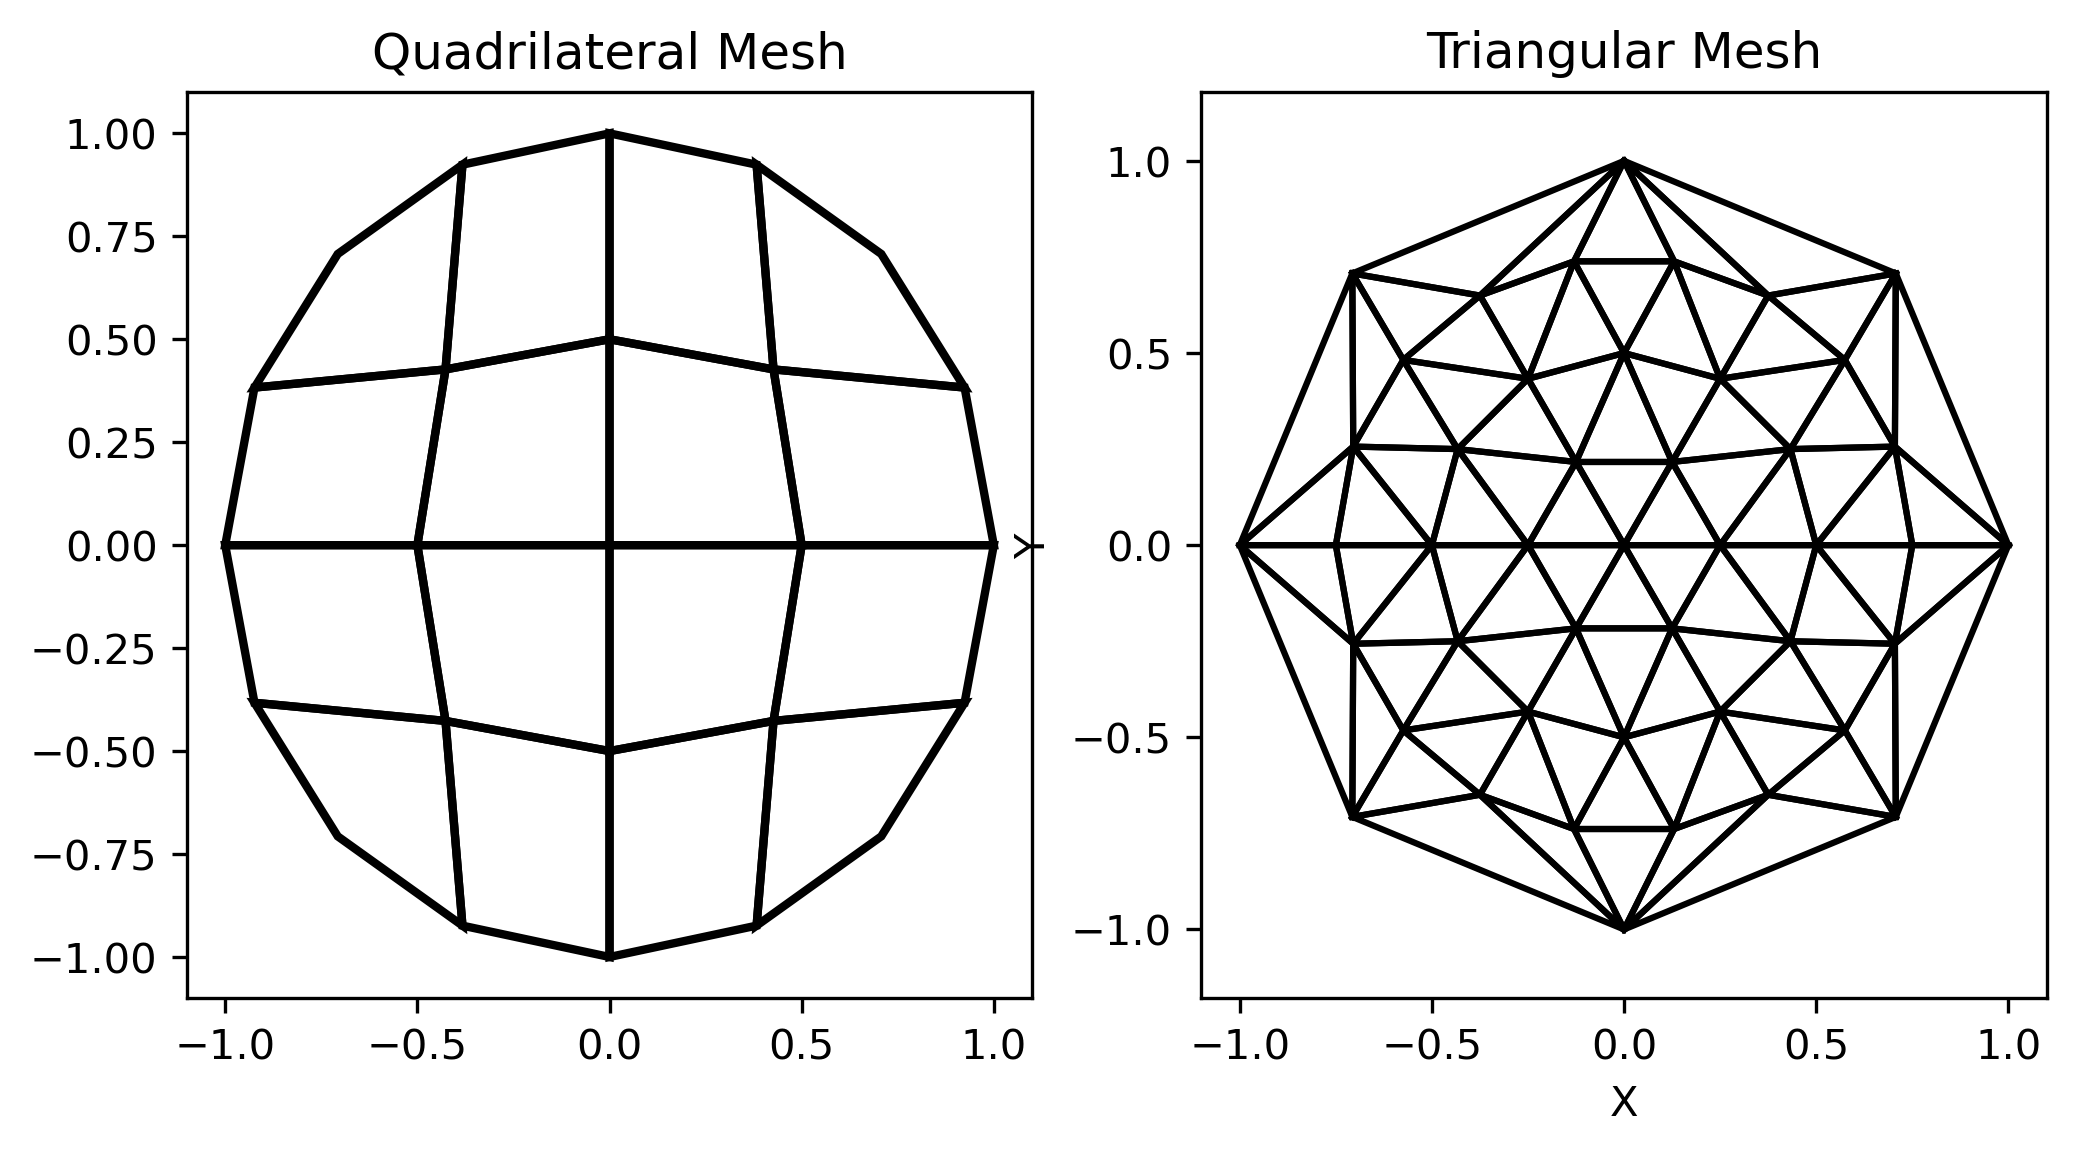

In [13]:
import matplotlib.pyplot as plt
def plot_quads(nodes, quads, ax):
    """Plots quadrilaterals on the given axes."""
    for q in quads:
        x = [nodes[q[i]][0] for i in range(len(q))]
        y = [nodes[q[i]][1] for i in range(len(q))]
        ax.fill(x, y, edgecolor='black', fill=False, linewidth=2)

# Assuming both plot functions are properly adjusted to accept an ax parameter

# Create a 1x2 subplot structure
fig, axs = plt.subplots(1, 2, figsize=(8, 4), dpi=300)

# Generate quadrilateral mesh data
nodes, quads, boundary_nodes = disk_quad(2, a=1.0)

# Plot quadrilateral mesh on the first subplot
plot_quads(nodes, quads, axs[0])

# Plot triangular mesh from XML on the second subplot
# You'll need to adjust plot_mesh_from_xml to accept an ax parameter as well
# This is a placeholder call as `plot_mesh_from_xml` function needs to be defined similarly
plot_mesh_from_xml('../meshes/circles/BND08/mesh_8_4.xml', axs[1])

# Set titles for each subplot for clarity
axs[0].set_title('Quadrilateral Mesh')
axs[1].set_title('Triangular Mesh')

plt.savefig('Figures/finite_element_meshes.eps', dpi=300, format='eps')
plt.show()


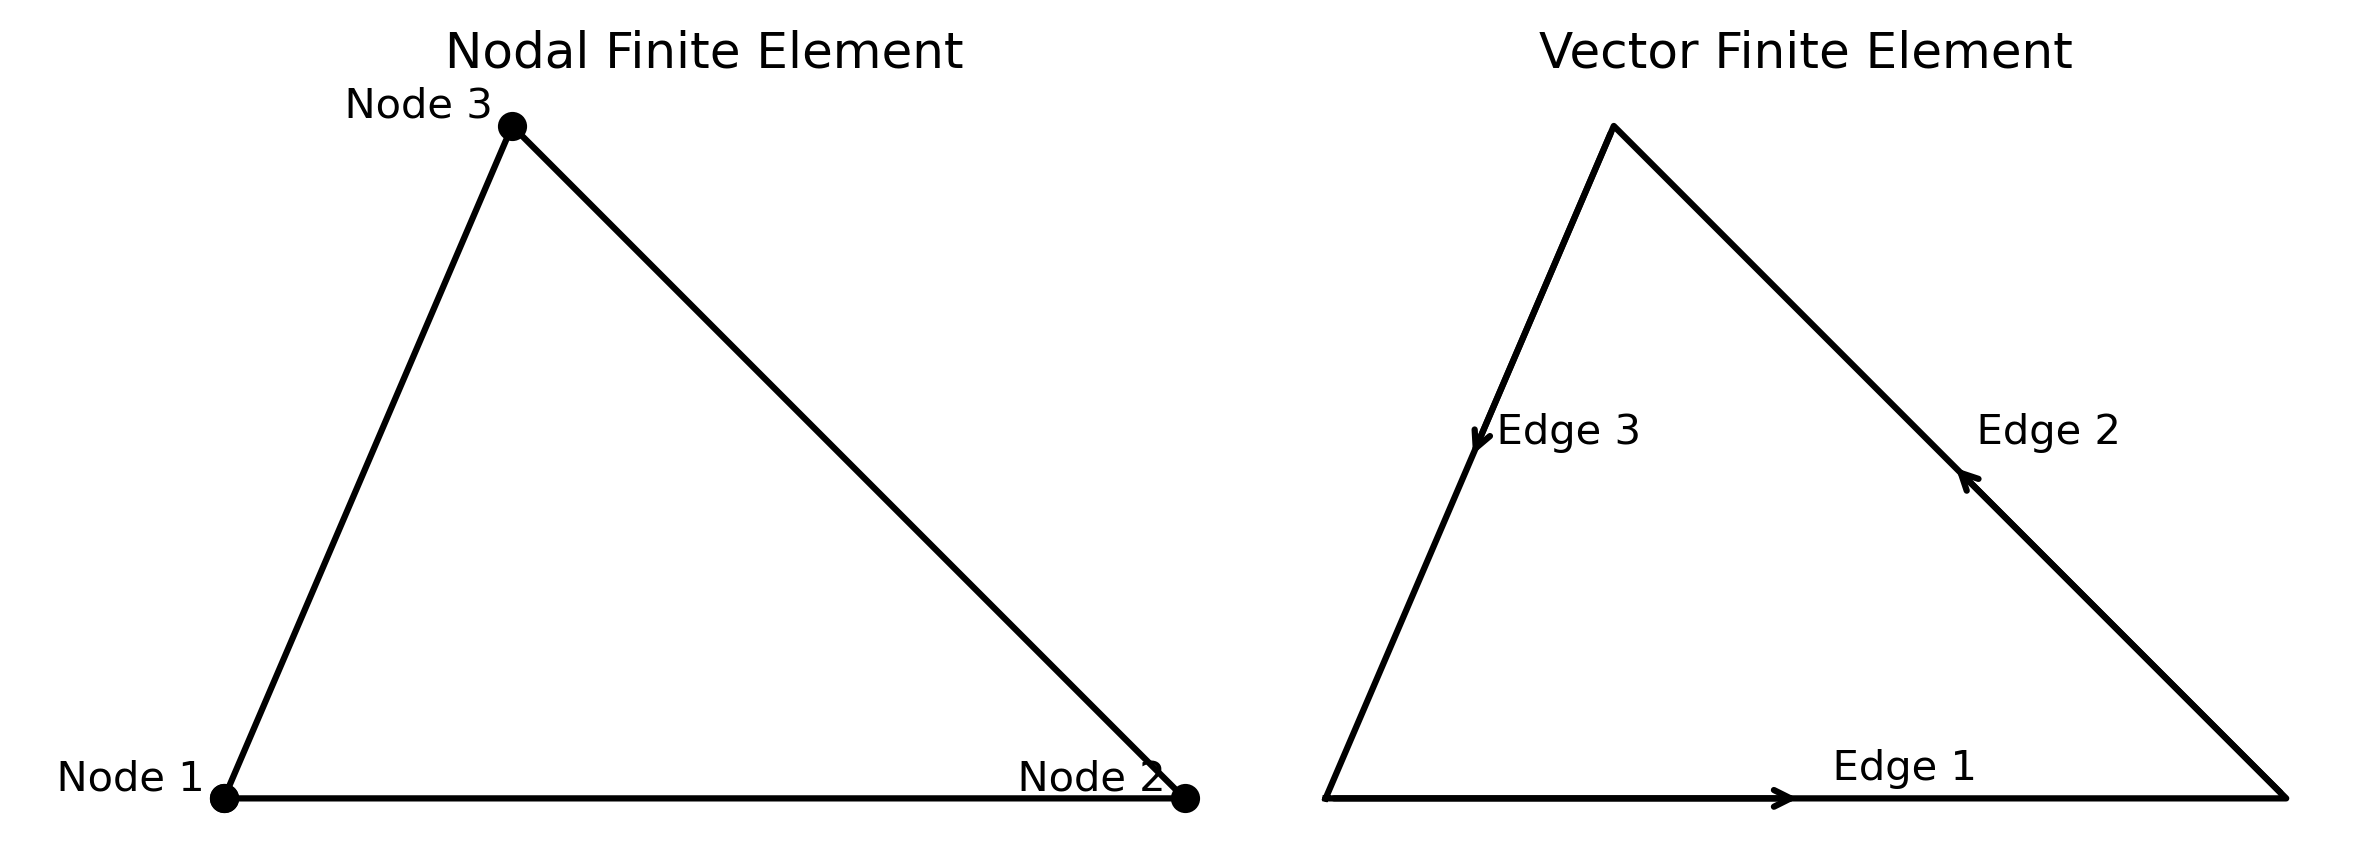

In [14]:
# Correcting the arrow placement to ensure they end at the midpoint
# Define the points of the triangle
points = [(0, 0), (1,0), (0.3, 0.7)]
node_labels = ['Node 1', 'Node 2', 'Node 3']
edge_labels = ['Edge 1', 'Edge 2', 'Edge 3']
# Create a 1x2 subplot again with corrected arrow placement
fig, ax = plt.subplots(1, 2, figsize=(8, 4), dpi=300)

# Lefthand plot: Simple nodal triangular finite element
ax[0].plot(*zip(*points, points[0]), marker='o', color='black')  # Draw the triangle and make a dot at each corner
for i, point in enumerate(points):
    ax[0].text(point[0]-0.02, point[1], f'  {node_labels[i]}', verticalalignment='bottom', horizontalalignment='right')

# Righthand plot: Vector finite element, correct arrows to end at midpoints
ax[1].plot(*zip(*points, points[0]), marker='', color='black')  # Draw the triangle
midpoints = [(0.5*(points[i][0]+points[(i+1)%3][0]), 0.5*(points[i][1]+points[(i+1)%3][1])) for i in range(3)]
for i, midpoint in enumerate(midpoints):
    start_point = ((points[i][0] + points[(i+1)%3][0])/2 - (points[(i+1)%3][0] - points[i][0])/2, 
                   (points[i][1] + points[(i+1)%3][1])/2 - (points[(i+1)%3][1] - points[i][1])/2)
    end_point = midpoint
    ax[1].annotate('', xy=end_point, xytext=start_point,
                   arrowprops=dict(arrowstyle="->", lw=1.5))
    ax[1].text(midpoint[0], midpoint[1]+0.01, f'  {edge_labels[i]}', verticalalignment='bottom', horizontalalignment='left')

# Adjustments
for a in ax:
    a.set_aspect('equal')
    a.axis('off')
ax[0].set_title('Nodal Finite Element')
ax[1].set_title('Vector Finite Element')

plt.tight_layout()
plt.savefig('Figures/finite_elements.eps', dpi=300, format='eps')
plt.show()


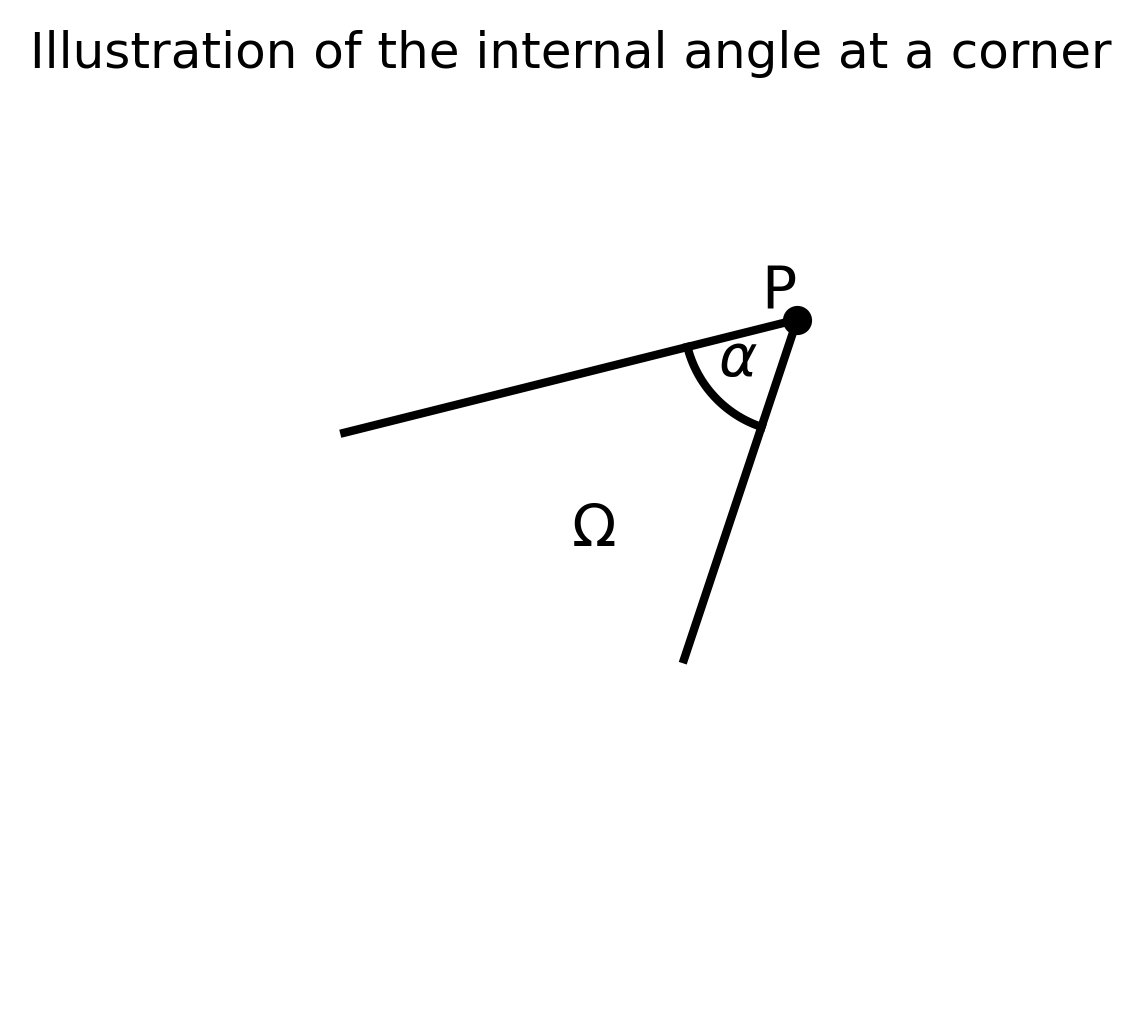

In [15]:
# Re-drawing the original figure with the circle around P
from math import atan2, degrees
from matplotlib.transforms import Bbox
# Function to calculate angle in degrees
def calc_angle(center, point):
    dx = point[0] - center[0]
    dy = point[1] - center[1]
    return degrees(atan2(dy, dx))
# Points
P = np.array([3, 3])
A = np.array([2.5, 1.5])
B = np.array([1.0, 2.5])
# Angles for A and B relative to P
angle_A = calc_angle(P, A)
angle_B = calc_angle(P, B)

# Ensuring the arc goes the shortest way around
if angle_A > angle_B:
    start_angle = angle_B
    end_angle = angle_A
else:
    start_angle = angle_A
    end_angle = angle_B

# Angle range for the arc
angle_range = np.linspace(np.radians(start_angle), np.radians(end_angle), 100)

# Coordinates for the arc
arc_x = P[0] + 0.5 * np.cos(angle_range)
arc_y = P[1] + 0.5 * np.sin(angle_range)

# Setting up the figure and axis
fig, ax = plt.subplots(figsize=(6, 4), dpi=300)

# Drawing lines
ax.plot([P[0], A[0]], [P[1], A[1]], 'k-', lw=2)
ax.plot([P[0], B[0]], [P[1], B[1]], 'k-', lw=2)

# Drawing the arc
ax.plot(arc_x, arc_y, 'k-', lw=2)

# Annotating points and angle
ax.plot(P[0], P[1], 'ko')  # Point P
ax.text(P[0], P[1], '  P', verticalalignment='bottom', horizontalalignment='right',fontsize = 14)

ax.text((P[0] - 0.35), (P[1]  - 0.25), r'$\alpha$', fontsize=14)  # Angle annotation
ax.text(2.0, 2.0, r'$\Omega$', fontsize=14)  # Omega annotation

ax.set_xlim(0, 4)
ax.set_ylim(0, 4)
ax.set_aspect('equal')
ax.set_title('Illustration of the internal angle at a corner')
plt.axis('off')
plt.savefig('angle_corner.eps', dpi=300, format='eps', 
            bbox_inches=Bbox([[0.0, 2.0], [6.0, 4.0]]))
plt.show()


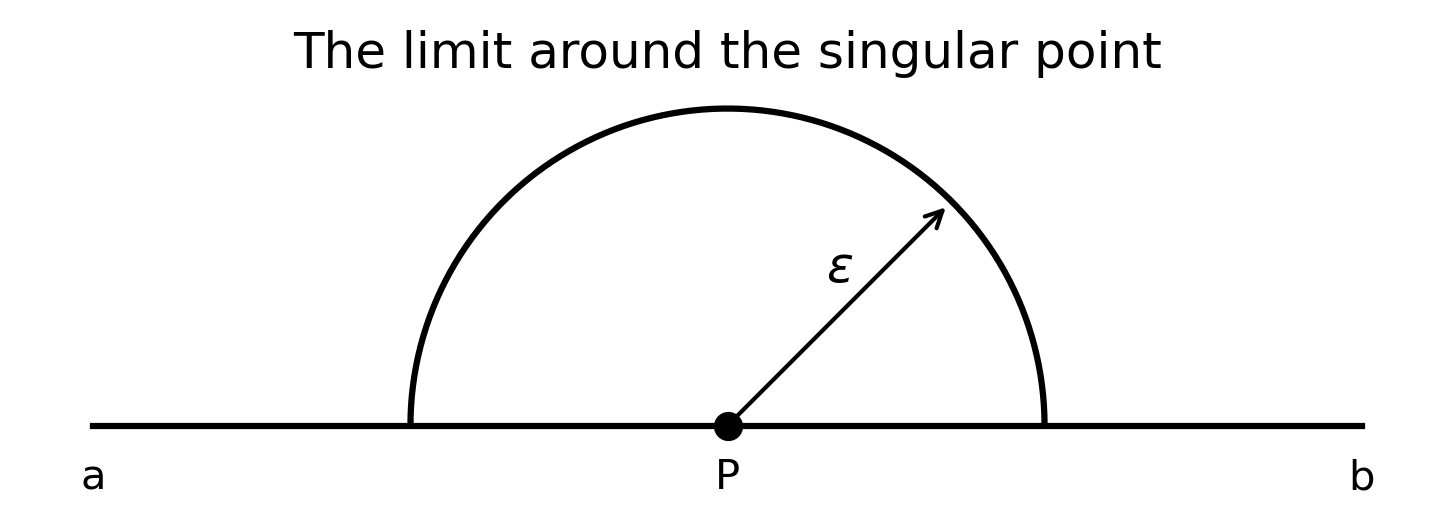

In [16]:
import matplotlib.pyplot as plt
import numpy as np
# Define the line segment from 0 to 2 on the x-axis
x_line = np.array([0, 2])
y_line = np.array([0, 0])

# Define the point P at x=1
P = np.array([1, 0])

# Define the circle around P with radius 0.5, but only plot the upper half
theta = np.linspace(0, np.pi, 100)  # Angle from 0 to pi to create a semi-circle
x_circle = 0.5 * np.cos(theta) + P[0]
y_circle = 0.5 * np.sin(theta) + P[1]

# Choose a point on the circle to which the arrow will point (45 degrees here for illustration)
arrow_end_x = 0.5 * np.cos(np.pi / 4) + P[0]
arrow_end_y = 0.5 * np.sin(np.pi / 4) + P[1]
# Create the plot with adjusted annotations and removed axes
plt.figure(figsize=(6, 4), dpi=300)
plt.plot(x_line, y_line, 'k')  # Plot the line
plt.plot(x_circle, y_circle, 'k')  # Plot the half circle
plt.scatter(*P, color='k')  # Plot point P

# Draw an arrow from P to a point on the circle
plt.annotate('', xy=(arrow_end_x, arrow_end_y), xytext=P, 
             arrowprops=dict(facecolor='black', arrowstyle='->'))

# Annotate the arrow with epsilon
plt.text((P[0] + arrow_end_x) / 2, (P[1] + arrow_end_y) / 2 + 0.05, '$\epsilon$', fontsize=12, ha='center')

# Annotate points 'P', 'a', and 'b'
plt.text(P[0], P[1] - 0.1, 'P', ha='center')
plt.text(x_line[0], y_line[0] - 0.1, 'a', ha='center')
plt.text(x_line[1], y_line[1] - 0.1, 'b', ha='center')

plt.axis('off')  # Remove the axes
plt.gca().set_aspect('equal', adjustable='box')
plt.title('The limit around the singular point')
plt.savefig('Figures/limit_singular_point.eps', dpi=300, format='eps')
plt.show()


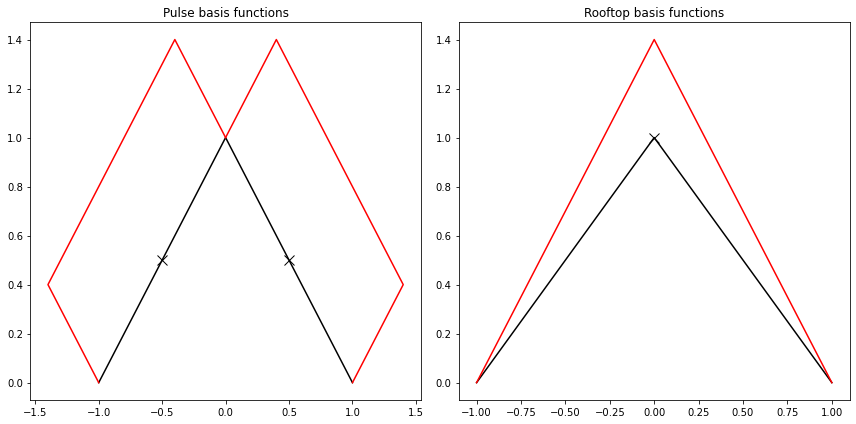

In [17]:
# Create a 1x2 subplot structure again with corrected marks
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Left plot corrections
# Draw the black lines
axs[0].plot([1, 0, -1], [0, 1, 0], 'k-') # Main black line
# Draw crosses at the midpoints correctly
midpoint_1 = [(1+0)/2, (0+1)/2] # Midpoint between [1,0] and [0,1]
midpoint_2 = [(0-1)/2, (1+0)/2] # Midpoint between [0,1] and [-1,0]
axs[0].plot(midpoint_1[0], midpoint_1[1], 'kx', markersize=10) # Correct midpoint
axs[0].plot(midpoint_2[0], midpoint_2[1], 'kx', markersize=10) # Correct midpoint
# Draw the red lines correctly
axs[0].plot([1, 1.4, 0.4, 0], [0, 0.4, 1.4, 1], 'r-') # First red line
axs[0].plot([-1, -1.4, -0.4, 0], [0, 0.4, 1.4, 1], 'r-') # Second red line
axs[0].set_title('Pulse basis functions')

# Right plot corrections
# Draw the black line
axs[1].plot([1, 0, -1], [0, 1, 0], 'k-') # Main black line
# Mark a cross at [0,1] correctly
axs[1].plot([0], [1], 'kx', markersize=10) # Cross at [0,1]
# Draw the red line correctly
axs[1].plot([1, 0, -1], [0, 1.4, 0], 'r-') # Red line
axs[1].set_title('Rooftop basis functions')

# Adjust layout and display the plots again
plt.tight_layout()
plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


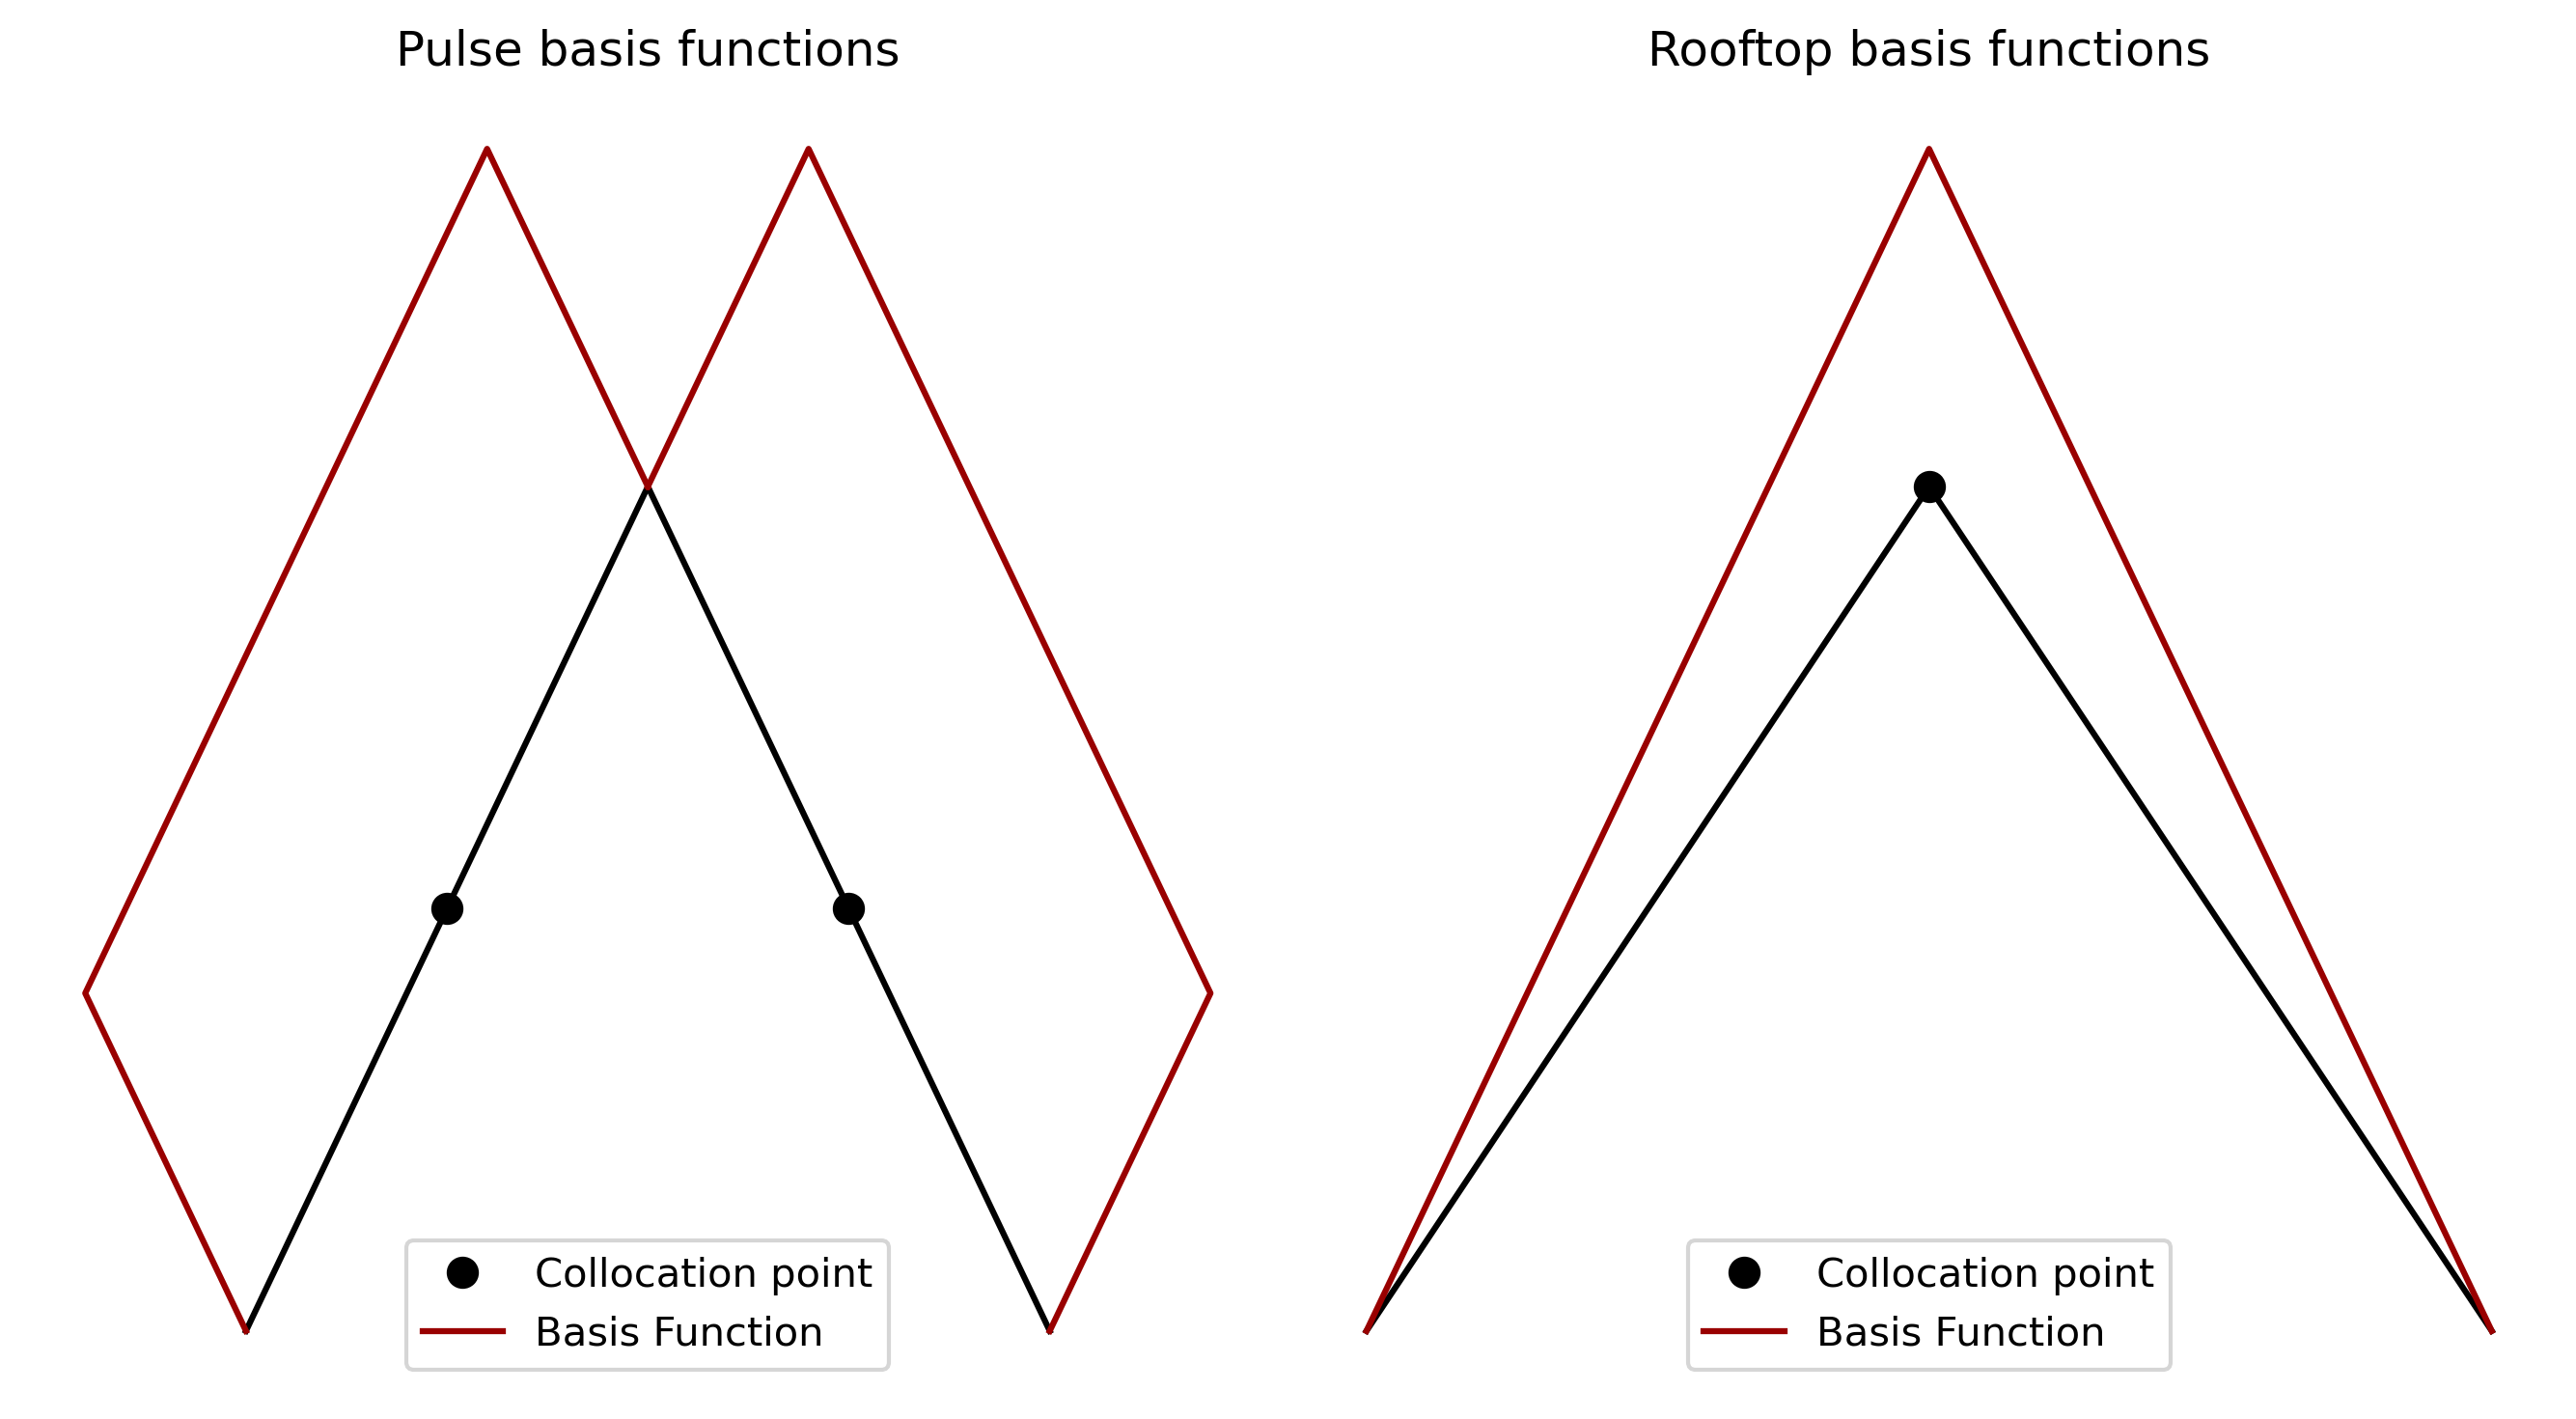

In [18]:
# Create a 1x2 subplot structure with final corrections
fig, axs = plt.subplots(1, 2, figsize=(9, 5),dpi = 300)

# Common settings for both plots
# Define the points for additional crosses along the lines
# Left plot - sample points not overlapping collocation points
left_sample_points_x = [-0.2, -0.3,-0.4,-0.6,-0.7,-0.8] # Skip the middle point
left_sample_points_y = [0.8, 0.7,0.6,0.4,0.3,0.2] # Skip the middle point

# Right plot - sample points can be freely distributed
right_sample_points_x =[0.2, 0.3,0.4,0.6,0.7,0.8]
right_sample_points_y =[0.8, 0.7,0.6,0.4,0.3,0.2]


# Left plot final corrections
# Draw the black lines
axs[0].plot([1, 0, -1], [0, 1, 0], 'k-', label='_nolegend_') # Main black line
# Draw crosses at the midpoints correctly and add legend for 'Collocation point'
axs[0].plot(midpoint_1[0], midpoint_1[1], 'ko', markersize=7, label='Collocation point') # Correct midpoint
axs[0].plot(midpoint_2[0], midpoint_2[1], 'ko', markersize=7, label='_nolegend_') # Correct midpoint
#axs[0].plot(left_sample_points_x, left_sample_points_y, 'x', markersize=6, label='Sample points',color = '#06255E') # Sample points
# Draw the red lines correctly
axs[0].plot([1, 1.4, 0.4, 0], [0, 0.4, 1.4, 1], '-', label='Basis Function',color = '#990000') # First red line
axs[0].plot([-1, -1.4, -0.4, 0], [0, 0.4, 1.4, 1], '-', label='_nolegend_',color = '#990000') # Second red line
#axs[0].plot(right_sample_points_x, right_sample_points_y, 'x', markersize=6, label='_nolegend_',color = '#06255E') # Sample points
axs[0].legend(loc='lower center')  # Add legend for the collocation point
axs[0].set_title('Pulse basis functions')

# Right plot final corrections
# Draw the black line'
axs[1].plot([0], [1], 'ko', markersize=7, label='Collocation point') # Cross at [0,1]
#axs[1].plot(right_sample_points_x, right_sample_points_y, 'x', markersize=6, label='Sample points',color = '#06255E') # Sample points
#axs[1].plot(left_sample_points_x, left_sample_points_y, 'x', markersize=6, label='_nolegend_',color = '#06255E') # Sample points
axs[1].plot([1, 0, -1], [0, 1, 0], 'k-', label='_nolegend_') # Main black line
# Mark a cross at [0,1] correctly and add legend for 'Collocation point'
# Draw the red line correctly
axs[1].plot([1, 0, -1], [0, 1.4, 0], '-', label='Basis Function',color = '#990000') # Red line
axs[1].set_title('Rooftop basis functions')

# Add legend to the left plot only (as requested)
axs[1].legend(loc='lower center')
# Adjust layout and display the plots again
#remove x and y axis
axs[0].axis('off')
axs[1].axis('off')
plt.tight_layout()
plt.savefig('Figures/Collocation_testing.eps', dpi=300, format='eps')
plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


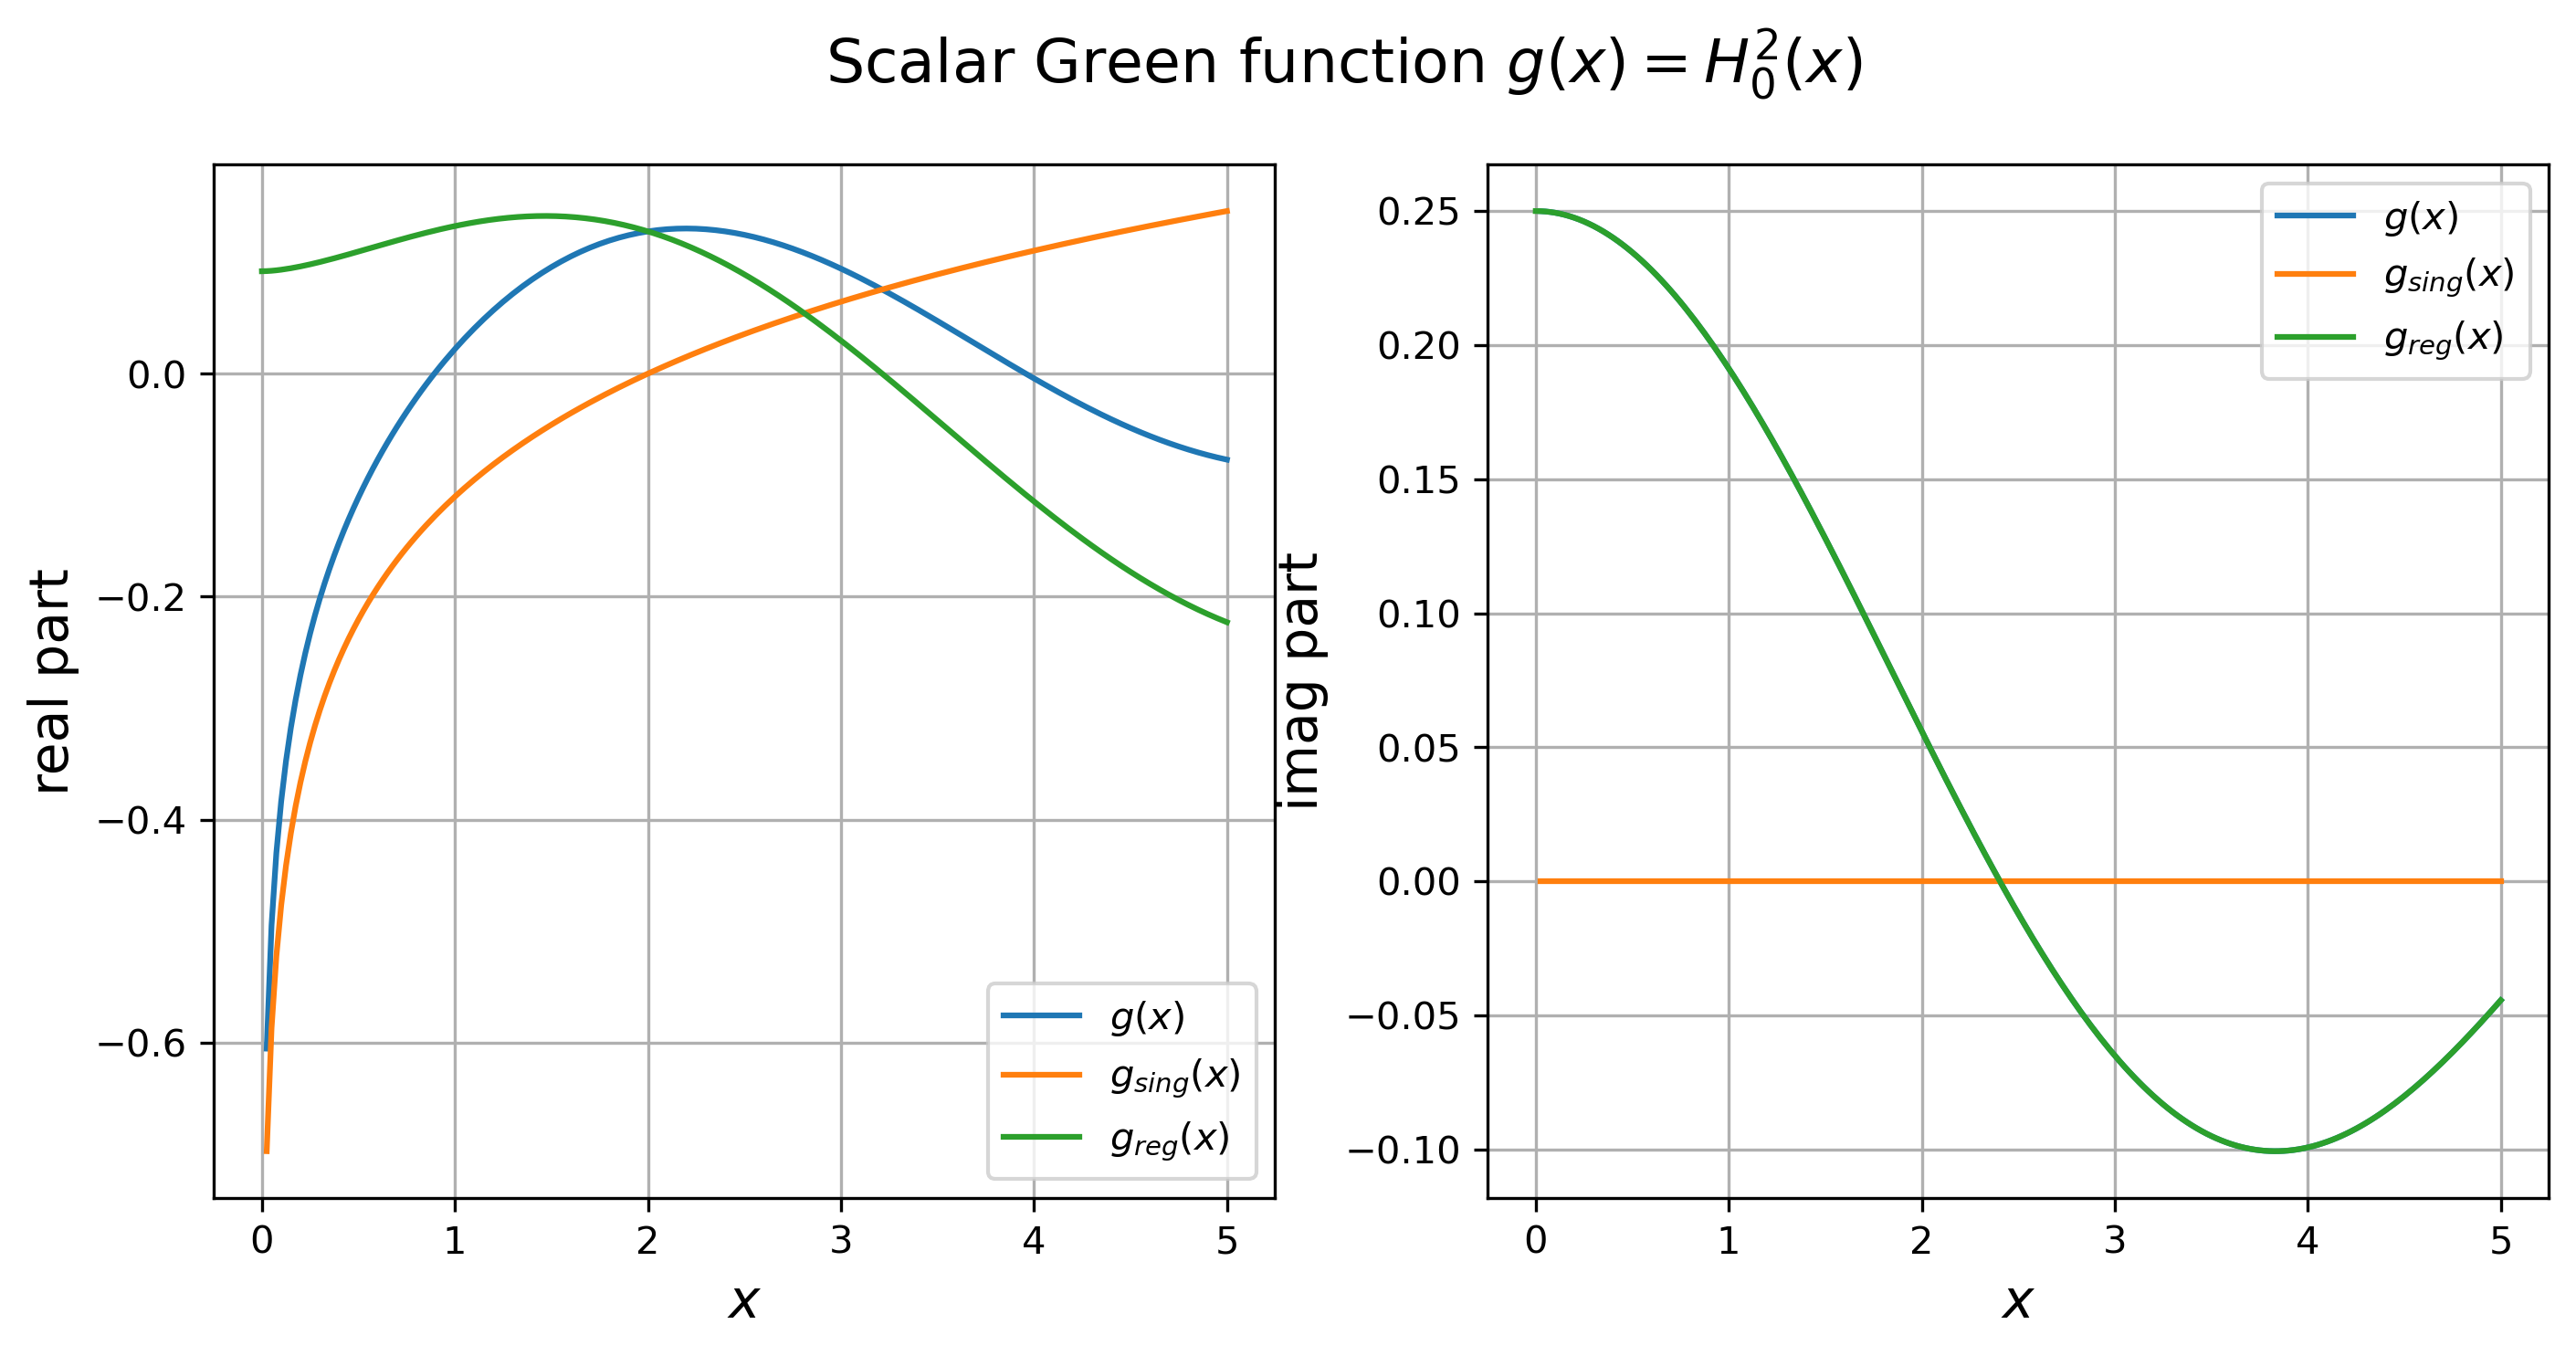

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


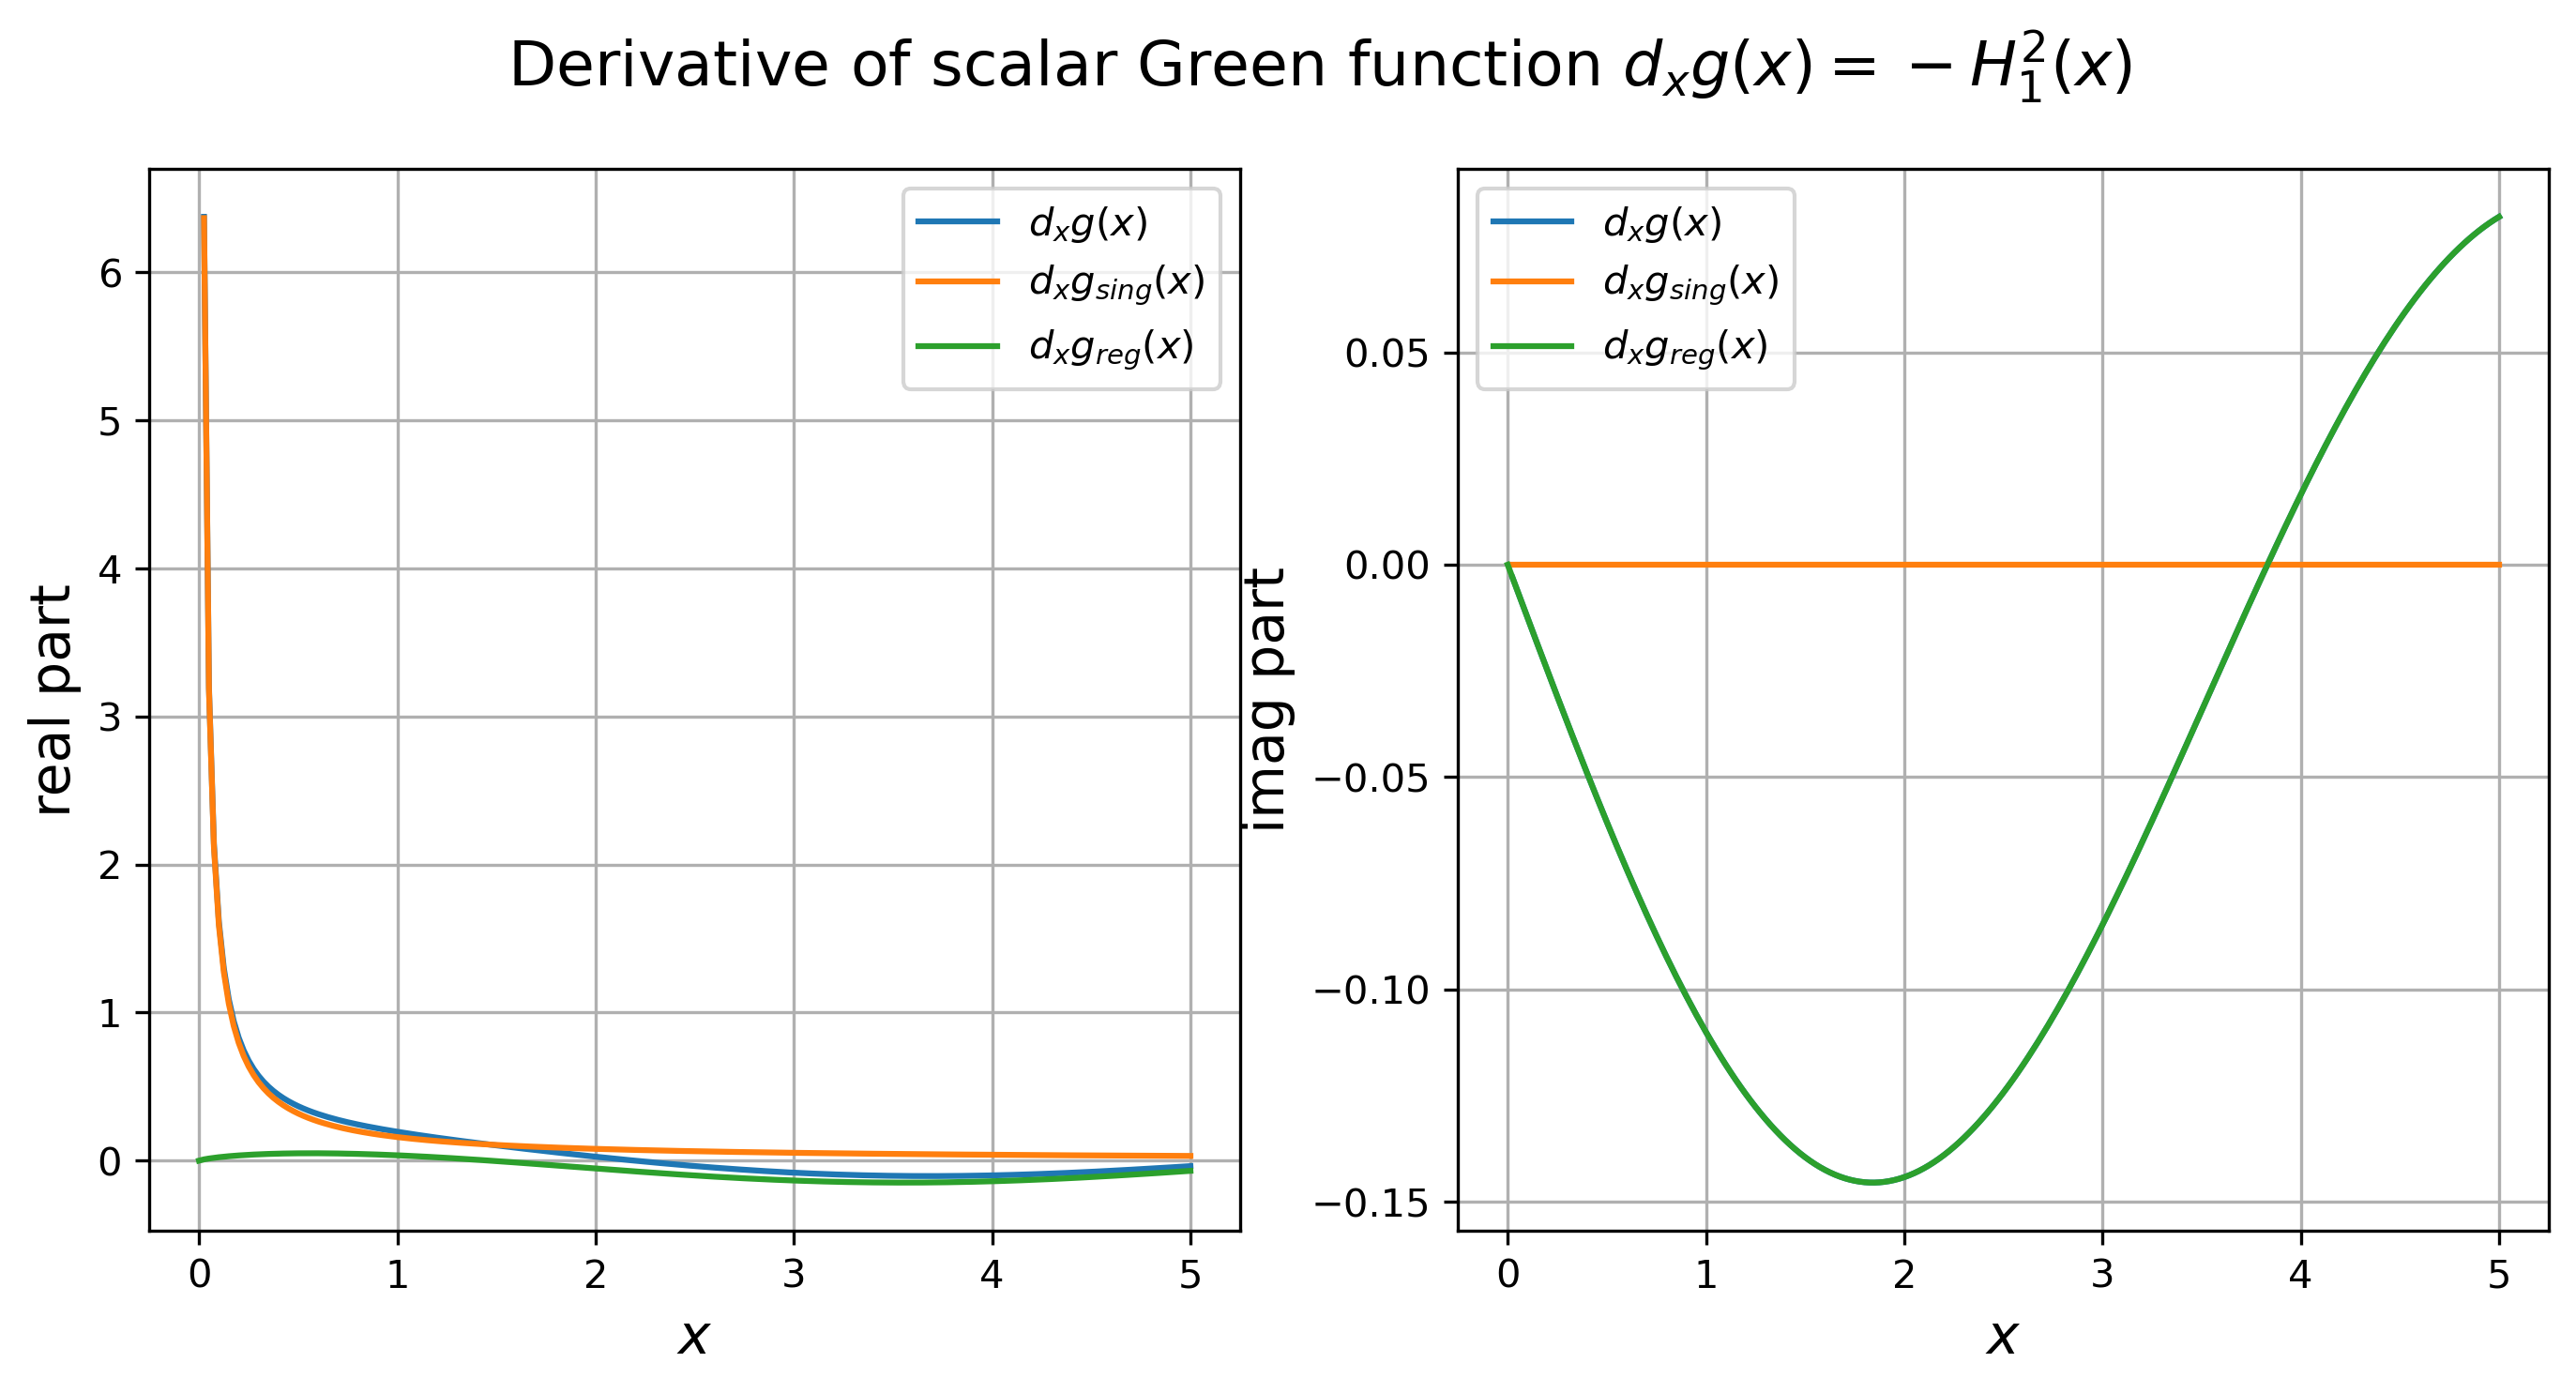

/tmp/ipykernel_20234/2988123476.py:300: RankWarning: Polyfit may be poorly conditioned
  poly = np.polyfit(eps, mom_int, deg=max(5,len(exp)))
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


mom_int: [0.07115659-4.18327059e-02j 0.12152233-2.30356285e-02j
 0.17097298-1.17933443e-02j 0.20772643-5.93145218e-03j
 0.22864184-2.97008423e-03j 0.23934947-1.48558722e-03j
 0.2446934 -7.42861757e-04j 0.24735285-3.71439398e-04j
 0.24867814-1.85720764e-04j 0.24933953-9.28605149e-05j]
f0: (0.250000000000412-2.057128985494161e-17j)


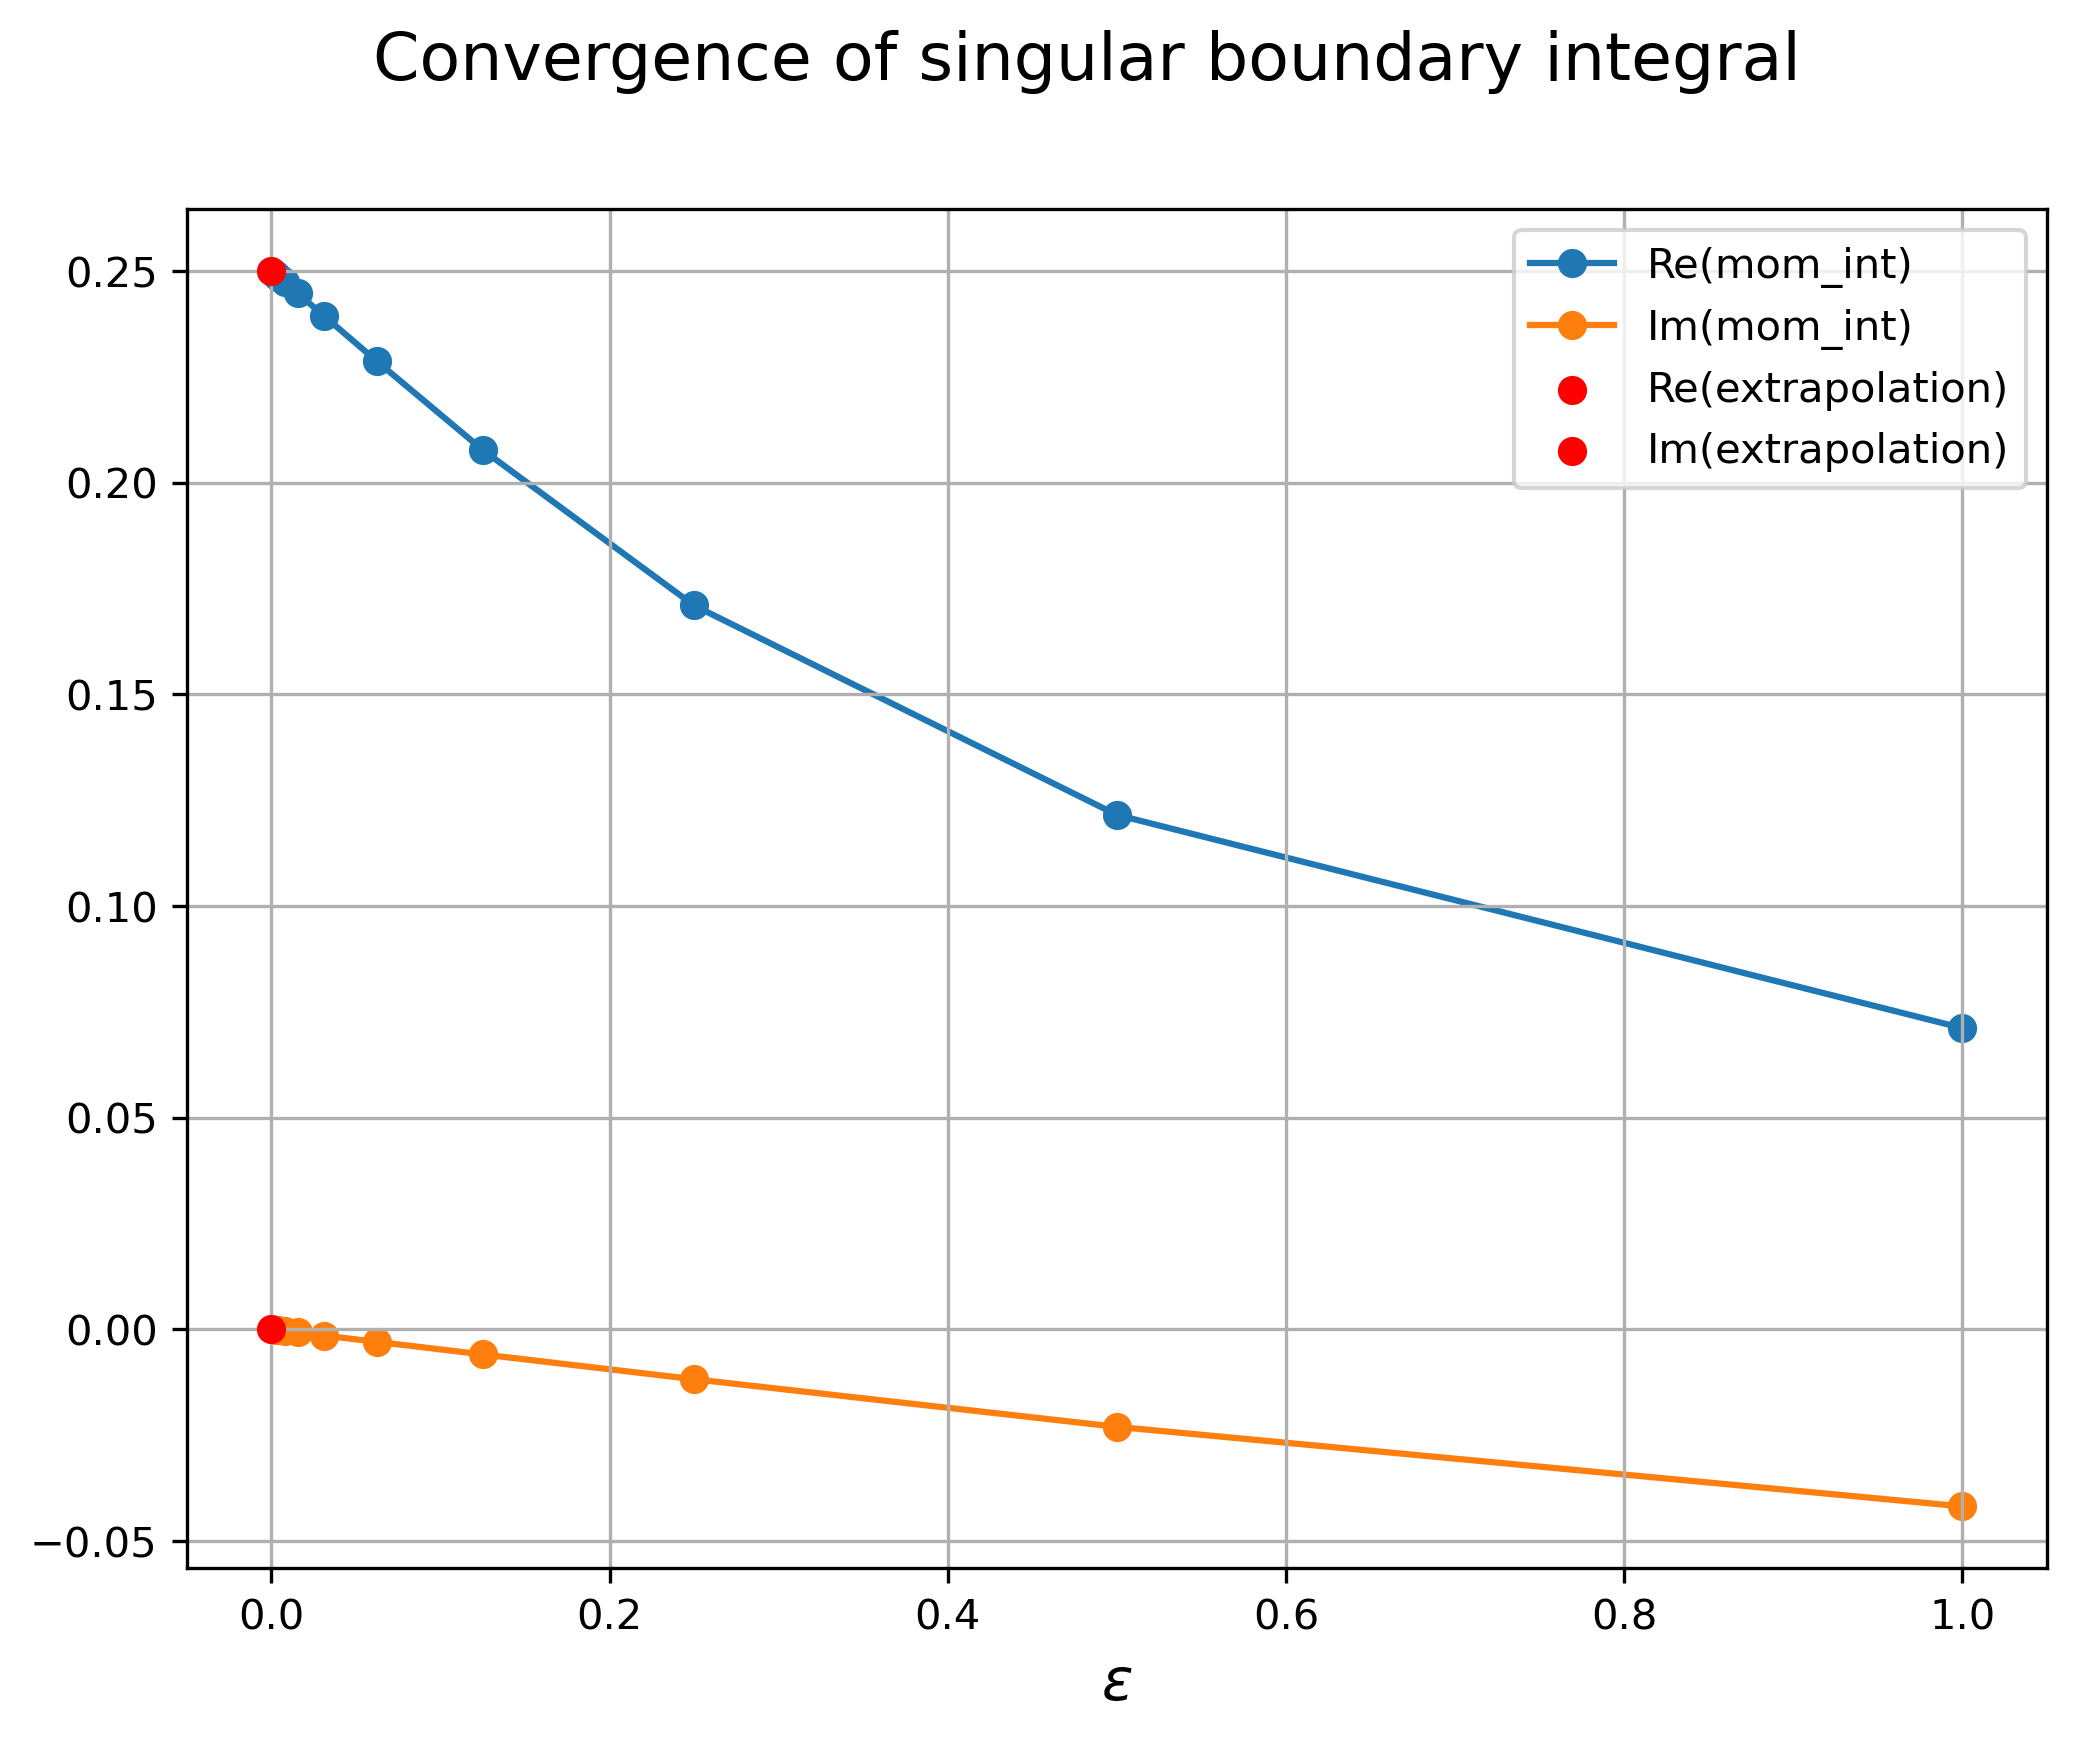

In [19]:
#! /usr/bin/env python3
# -*- coding: utf-8 -*-
"""
FEM-BEM
strong singularity
"""

import numpy as np
from numpy.linalg import norm
from numpy.polynomial.legendre import leggauss
#from GL_logarithmic import GL_log

from scipy.special import hankel2 as Hankel2n
from scipy.special import jv as BesselJn
from scipy.integrate import quad

import matplotlib.pyplot as plt

# constants
M_PI = np.pi
M_2PI = 2*M_PI
M_1_PI = 1/M_PI
M_2_PI = 2/M_PI
M_GAMMA = 0.57721566490153286060651 # Euler-Mascheroni constant

# constant in front of the Hankel function
H0 = 0.25j

# Hankel function H^2_0
def H20(x) :
    return Hankel2n(0,x)

def H21(x) :
    return Hankel2n(1,x)

def J0(x) :
    return BesselJn(0,x)

def J1(x) :
    return BesselJn(1,x)

# dynamic scalar Green's function
def g(x):
    return H0*H20(x)

# singular part scalar Green's function
def gsing(x):
    return H0*(-1j*M_2_PI * np.log(0.5*x))

# regularized scalar Green's function
@np.vectorize
def greg(x) :
    
    if (abs(x) != 0) :
        return g(x) - gsing(x)
    
    else :
        
        return H0*(J0(x) - 1j*M_2_PI*M_GAMMA)

# first derivative of dynamic scalar Green's function
def dg(x) : 
    return -H0*H21(x)

# singular part of first derivative of dynamic scalar Green's function
def dgsing(x) :
    return -H0 * (1j*M_2_PI/x) 

# regularized first derivative of dynmaic scalar Green's function
@np.vectorize
def dgreg(x) :

    if (abs(x) != 0.0) :
        return dg(x) - dgsing(x)
    
    else :        
        return complex(0.0)

# distance function
D = lambda s,sp : norm(s-sp)

# gradient of distance function
def grad_D(s, sp) :
    d = s-sp
    
    n = norm(d)
    
    if (n>0) :
        ud = d/norm(d)
        return ud
    else :
        return d


# plot scalar Green's function
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(0, 5, 201)
x1 = np.delete(x, 0)

y1 = g(x1)
y2 = gsing(x1)
y3 = greg(x)

fig, axs = plt.subplots(nrows=1, ncols=2,figsize=(11, 5),dpi = 300)
fig.suptitle(r'Scalar Green function $g(x) = H_0^{2}(x)$', fontsize=16)

axs[0].plot(x1, np.real(y1), label=r'$g(x)$')
axs[0].plot(x1, np.real(y2), label=r'$g_{sing}(x)$')
axs[0].plot(x, np.real(y3), label=r'$g_{reg}(x)$')

axs[1].plot(x1, np.imag(y1), label=r'$g(x)$')
axs[1].plot(x1, np.imag(y2), label=r'$g_{sing}(x)$')
axs[1].plot(x, np.imag(y3), label=r'$g_{reg}(x)$')

for k in [0, 1]:
    axs[k].grid()
    axs[k].legend()
    axs[k].set_xlabel(r'$x$', fontsize=14)

axs[0].set_ylabel('real part', fontsize=14)
axs[1].set_ylabel('imag part', fontsize=14)
plt.savefig('Figures/Scalar_Green_function.eps', dpi=300, format='eps')
plt.show()

    

import numpy as np
import matplotlib.pyplot as plt

# Assuming dg, dgsing, and dgreg are defined functions for the context of this snippet

x = np.linspace(0, 5, 201)
x1 = np.delete(x, 0)

y1 = dg(x1)
y2 = dgsing(x1)
y3 = dgreg(x)

fig, axs = plt.subplots(nrows=1, ncols=2,figsize=(11, 5),dpi = 300)
fig.suptitle(r' Derivative of scalar Green function $d_x g(x) = -H_1^{2}(x)$', fontsize=16)

axs[0].plot(x1, np.real(y1), label=r'$d_x g(x)$')
axs[0].plot(x1, np.real(y2), label=r'$d_x g_{sing}(x)$')
axs[0].plot(x, np.real(y3), label=r'$d_x g_{reg}(x)$')

axs[1].plot(x1, np.imag(y1), label=r'$d_x g(x)$')
axs[1].plot(x1, np.imag(y2), label=r'$d_x g_{sing}(x)$')
axs[1].plot(x, np.imag(y3), label=r'$d_x g_{reg}(x)$')

for k in [0, 1]:
    axs[k].grid()
    axs[k].legend()
    axs[k].set_xlabel(r'$x$', fontsize=14)

axs[0].set_ylabel('real part', fontsize=14)
axs[1].set_ylabel('imag part', fontsize=14)
plt.savefig('Figures/Scalar_Green_function_derivative.eps', dpi=300, format='eps')
plt.show()



# radius of cicle
R = 1.0

# wavenumber in background medium
kb = 1.0

# define number of points/segments to approximate boundary of cicle
num_pts = 2**3

# define points indices
idx_pts = range(num_pts)

# number of segments; since the boundary is closed the number of segments equals the number of points
num_seg = num_pts

# discrete angles of boundary nodes
phi = np.array([k*M_2PI/num_pts for k in idx_pts])
# print('phi:\n', phi)#

# boundary nodes
bnd_pts = np.array([[R*np.cos(phik), R*np.sin(phik)] for phik in phi])
# print('pts:\n', pts)

# define boundary segments:
# first index: first point of segment
# seconed index: second point of segment
bnd_seg = np.array([[k, (k+1) % num_pts] for k in range(num_pts)])
# print('seg:\n', bnd_seg)

# define segment indices
idx_seg = range(len(bnd_seg))

# define collocation points: centres of segments
col_pts = np.array([0.5 * (bnd_pts[bnd_seg[k][0]] + bnd_pts[bnd_seg[k][1]]) for k in idx_seg])
# print('col_pts:\n', col_pts)

# outward normals: pointing from the dielectric cylinder into the surrounding background medium
n_hat = np.zeros((num_seg,2), dtype=np.double)
for k in idx_seg :
    
    # get start and end point of the segment k
    r0, r1 = bnd_pts[bnd_seg[k]]
    
    # tangential vector
    t = 0.5*(r0-r1)
    # print('t:', t)
    
    # vector normal to t, thus perpendicular to the boundary, pointing outwards
    n = np.array([ t[1], -t[0] ])
    # print('n:', n)
    
    # unit normal
    hat_n = n/norm(n)
    # print('hat_n:', hat_n)
    # print('n \cdot t:', n.dot(t))
    
    n_hat[k] = hat_n


# computation of stronly singular boundary integral:
# \lim_{\varepsilon \rightarrow 0} \int_{segment} \partial g/\partial n |_{|rc + eps*n' - r'|} dl'
# 
# we implement the above definition of the integral as limit value when the observer approaches
# the boundary from outside
if (1) :
   
    # choose an arbitrary segment
    idx_s0 = 0
    s0 = bnd_seg[idx_s0]
    # print('s0:', s0)
    
    # collocation point
    # since we are interested in the singular case, we chose 
    # the collocation point assocaited with the chosen segment
    rc = col_pts[idx_s0]
    
    # calculate vector from first to second point
    r0, r1 = bnd_pts[s0]
    dr = 0.5*(r0-r1)
    # print('dr:', dr)
    
    # jacobian
    jac = norm(dr)
    
    hat_n = n_hat[idx_s0]
    # print('hat_n:', hat_n)
    
    # centre of segment as origin of parametrized boundary integral
    r2 = 0.5*(r0+r1)
    # print('r2:', r2)
    
    # parameterized boundary: -1 <= t <= 1
    r = lambda t : r2 + t*dr
    
    
    # basis function
    # defined in the interval -1 < t < 1, which corresponds to a segment:
    # t=-1 corresponds to the start point of the segment
    # t=+1 corresponds to the end point of the segment
    #
    bf = lambda t : 1.0  # pulse basis function
    bf = lambda t : 0.5*(1-t) # linear basis function: falling branch
    bf = lambda t : 0.5*(1+t) # linear basis function: raising branch
    
    
    # the observer point is moved slightly outside the boundary
    # sequence of relative distances to boundary
    # increase number of distances to get closer to the boundary and better approximations of the integral
    exp = np.arange(10)
    eps = 2.0**(-exp)
    
    # reserve memory for results
    mom_int = np.zeros( len(exp), dtype=complex)
    
    for k in range(len(exp)) : 
        epsk = eps[k]
        
        # integrand
        f = lambda t : kb * bf(t) * hat_n.dot( dg(kb*D(rc+epsk*hat_n, r(t))) * grad_D(rc+epsk*hat_n,r(t)) )
        
        # the difficulty (singularity) occurs at the collocation point
        # which is at the centre of the segment, thus t=0
        t0 = [0]
        
        # calculate boundary integral
        mom_intk, abs_err = quad(f, a=-1, b=1, points=t0, complex_func=True)
        
        # print(mom_intk)
        
        mom_int[k] = jac * mom_intk
            
    print('mom_int:', mom_int)
    
    # extrapolate the results of the boundary integral to eps=0
    # polynomial fit
    poly = np.polyfit(eps, mom_int, deg=max(5,len(exp)))
    # extrapolation: evaluate polynomial at eps=0
    f0 = np.polyval(poly,0)
    print('f0:', f0)
    
import matplotlib.pyplot as plt
import numpy as np

# Assuming eps, mom_int, and f0 are defined

# plot convergence
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6), dpi=300)
fig.suptitle('Convergence of singular boundary integral', fontsize=16)

# Plotting the real and imaginary parts of mom_int
ax.plot(eps, np.real(mom_int), 'o-', label='Re(mom_int)', zorder=1)
ax.plot(eps, np.imag(mom_int), 'o-', label='Im(mom_int)', zorder=1)

# Plotting the extrapolation dot for both real and imaginary parts with higher zorder
ax.scatter(0, np.real(f0), color='red', label='Re(extrapolation)', zorder=2)  # Real part
ax.scatter(0, np.imag(f0), color='red', label='Im(extrapolation)', zorder=2)  # Imaginary part

ax.legend()
ax.grid()
ax.set_xlabel(r'$\varepsilon$', fontsize=14)
plt.savefig('Figures/convergence_singular_boundary_integral.eps', dpi=300, format='eps')
plt.show()










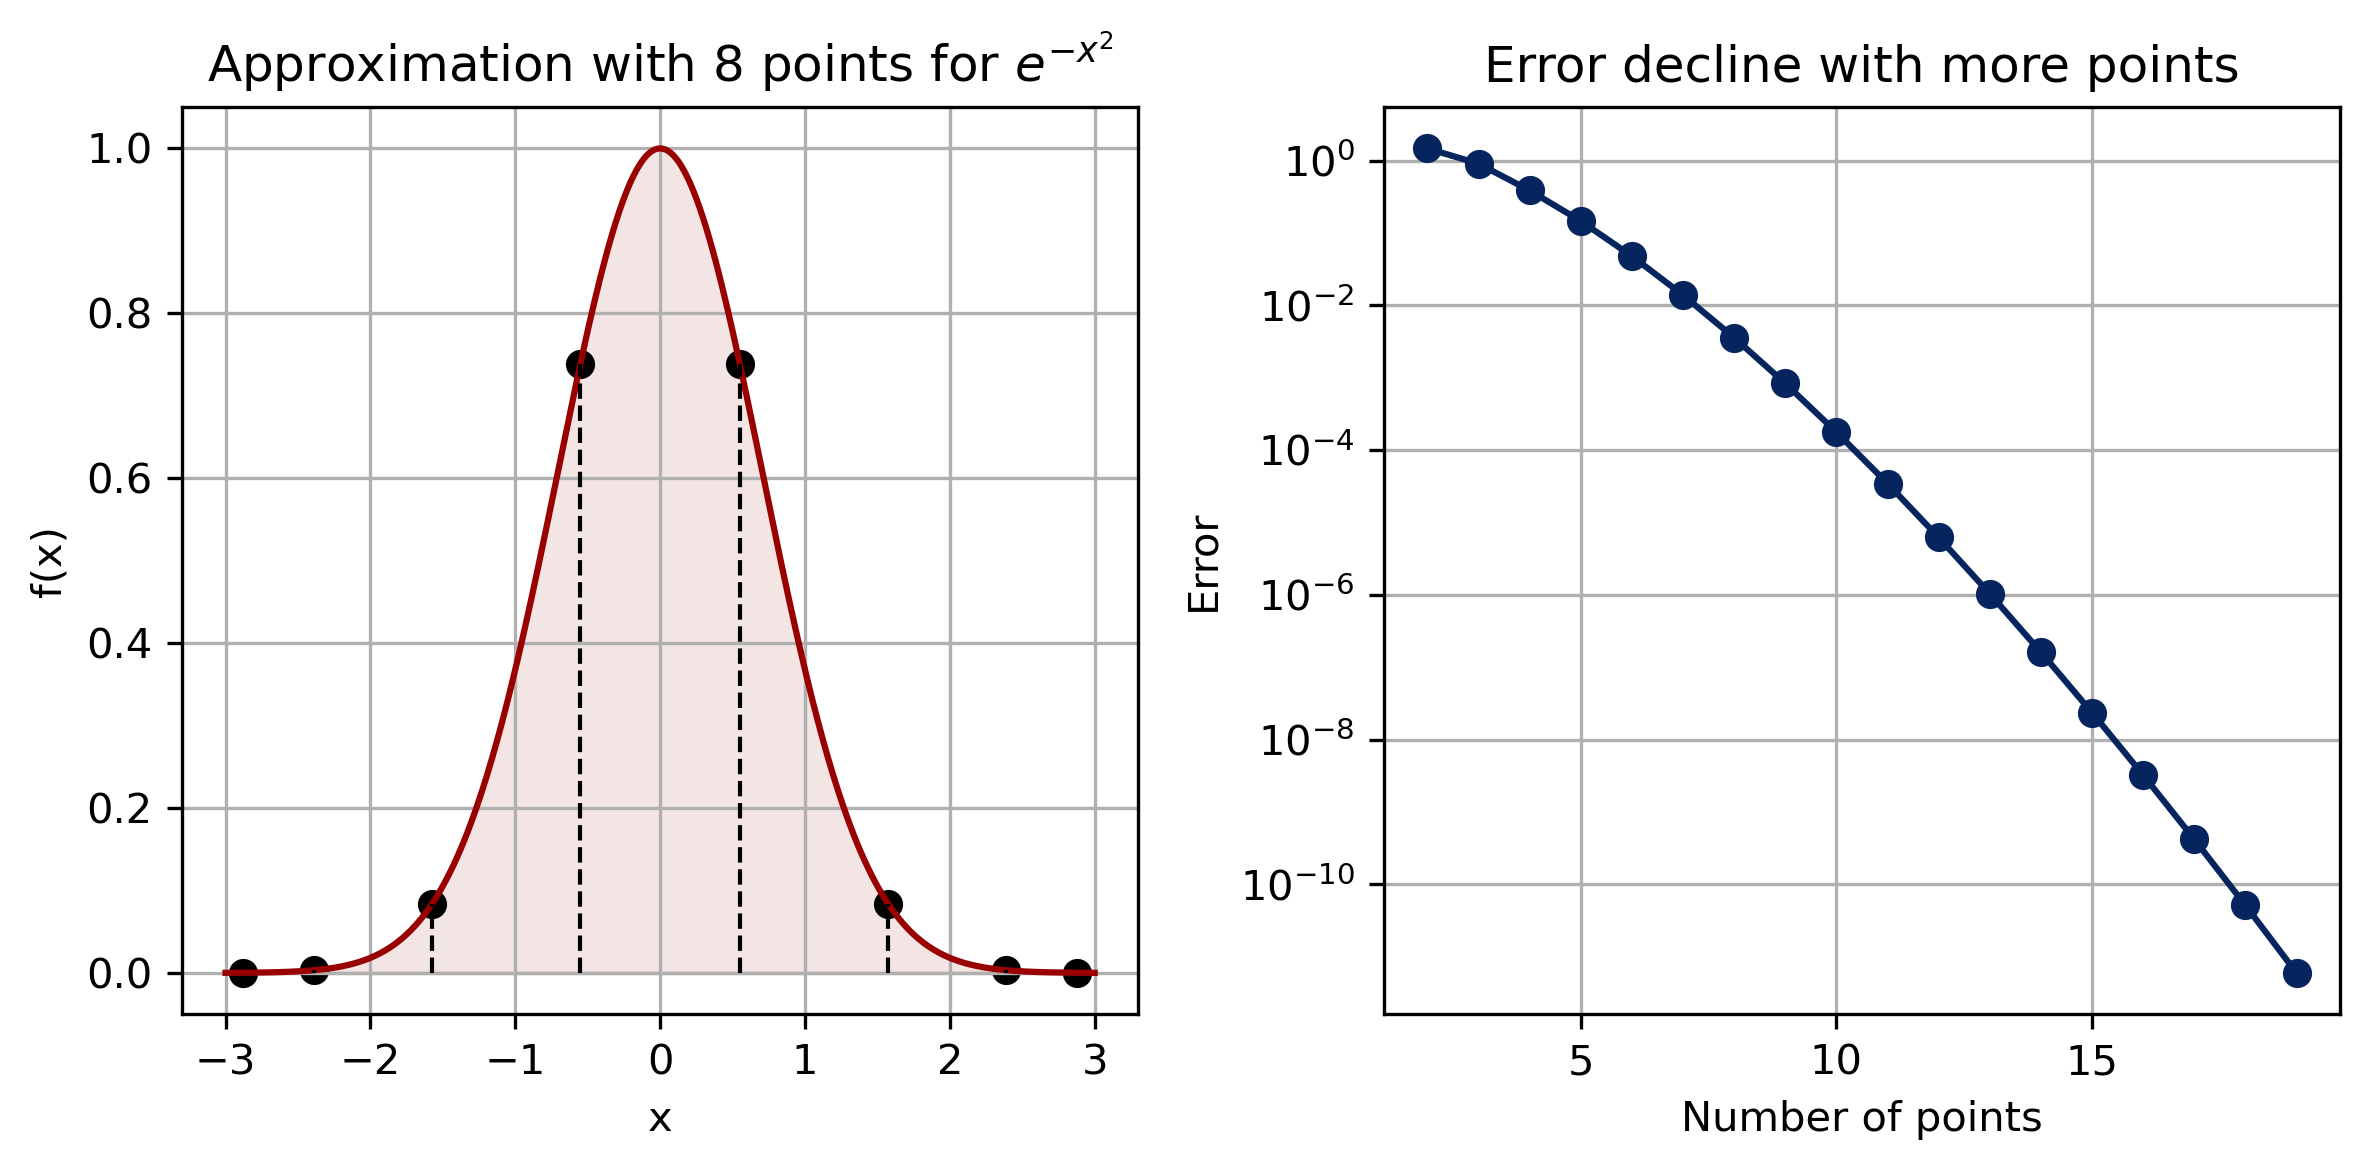

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.legendre import leggauss
from scipy.integrate import quad

# Define the function to integrate
f = lambda x: np.exp(-x**2)

# Define the integration interval
a, b = -3, 3

# Calculate the actual value of the integral
actual_integral, _ = quad(f, a, b)

# Points to evaluate the original function for plotting
x = np.linspace(a, b, 500)
y = f(x)

# Number of points for Gaussian quadrature in each subplot
point_range = np.arange(2, 20)  # From 2 to 8 points
errors_leggauss = []

for n in point_range:
    x_quad, w_quad = leggauss(n)
    # Map the quadrature points to the interval [a, b]
    x_mapped = 0.5 * (x_quad + 1) * (b - a) + a
    integral_approx = np.dot(w_quad, f(x_mapped)) * 0.5 * (b - a)
    errors_leggauss.append(np.abs(integral_approx - actual_integral))

# Selected number of points for the approximation
n_selected = 8
x_quad, w_quad = leggauss(n_selected)
x_mapped = 0.5 * (x_quad + 1) * (b - a) + a

# Adjusting plots with leggauss
fig, ax = plt.subplots(1, 2, figsize=(8, 4), dpi = 300)

# Left subplot: Approximation using selected number of points with leggauss
ax[0].plot(x, y, '-', label='Original function',color = '#990000')
ax[0].fill_between(x, 0, y, color='#990000', alpha=0.1)
ax[0].scatter(x_mapped, f(x_mapped), color='black')
for xi, yi in zip(x_mapped, f(x_mapped)):
    ax[0].plot([xi, xi], [0, yi], 'k--', lw=1)
ax[0].set_title('Approximation with {} points for $e^{{-x^2}}$'.format(n_selected))
ax[0].set_xlabel('x')
ax[0].set_ylabel('f(x)')
ax[0].grid(True)

# Right subplot: Error decline with increasing number of points using leggauss, y-axis in logarithmic scale
ax[1].plot(point_range, errors_leggauss, 'o-', label='Error',color = '#06255E')
ax[1].set_xlabel('Number of points')
ax[1].set_ylabel('Error')
ax[1].set_title('Error decline with more points')
ax[1].set_yscale('log')  # Setting the y-axis to logarithmic scale
ax[1].grid(True)

plt.tight_layout()
plt.show()



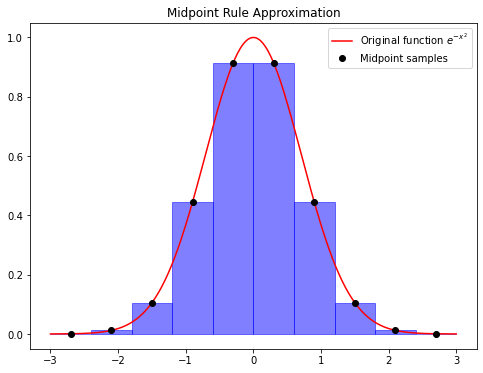

1.772431178926446

In [21]:
# Define the midpoint rule function for integration
def midpoint_rule(f, a, b, n):
    h = (b - a) / n
    result = 0
    for i in range(n):
        result += f(a + i * h + h / 2)
    result *= h
    return result

# Number of subintervals for the midpoint rule
n_subintervals = 10  # More discretization for visual representation

# Calculate the approximate integral using the midpoint rule
midpoint_integral = midpoint_rule(f, a, b, n_subintervals)

# Calculate midpoints and heights for rectangles
midpoints = np.linspace(a + (b - a)/(2*n_subintervals), b - (b - a)/(2*n_subintervals), n_subintervals)
heights = f(midpoints)
width = (b - a) / n_subintervals

# Creating a plot to visualize the midpoint rule approximation
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the original function
ax.plot(x, y, 'r-', label='Original function $e^{-x^2}$')

# Draw rectangles for the midpoint rule
for (mid, height) in zip(midpoints, heights):
    ax.add_patch(plt.Rectangle((mid - width/2, 0), width, height, edgecolor='blue', facecolor='blue', alpha=0.5))

# Draw the midpoints on the function curve
ax.plot(midpoints, heights, 'ko', label='Midpoint samples')

ax.set_title('Midpoint Rule Approximation')
ax.legend()

plt.show()

midpoint_integral


[0.14846420798774906,
 0.8772424858149263,
 0.6374120150481661,
 0.5056803920766852,
 0.47883721491656217,
 0.9665272183119908]

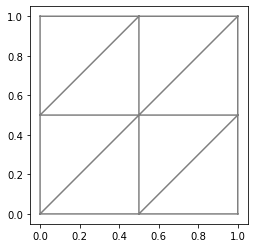

In [22]:
from fenics import *
import numpy as np
# Example: Create a mesh
mesh = UnitSquareMesh(2, 2)
plot(mesh)

# Define DG0 function space
V_dg = FunctionSpace(mesh, 'DG', 0)

# Define a function u_dg in V_dg
u_dg = Function(V_dg)

# Example: Populate u_dg with some values (for demonstration)
# In practice, u_dg might be the solution to a PDE
u_dg.vector()[:] = np.random.rand(u_dg.vector().size())
# Step 2: Find cells adjacent to the boundary
boundary_cells = set()
for f in facets(mesh):
    if f.exterior():  # Check if the facet is on the boundary
        for c in cells(f):
            boundary_cells.add(c.index())

# Step 3: Access DG0 values for these cells
boundary_values = [u_dg.vector()[c] for c in boundary_cells]

# Now, 'boundary_values' contains the values of 'u_dg' for the outermost cells

boundary_values

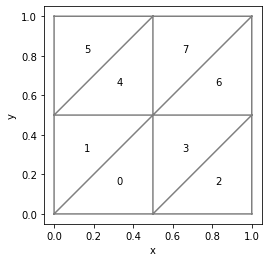

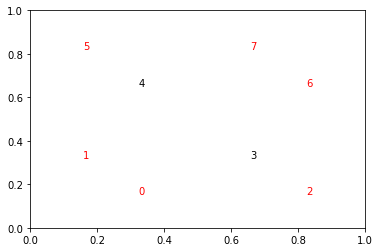

In [23]:
import matplotlib.pyplot as plt

# First, plot the mesh using FEniCS's plot function
plt.figure()
plot(mesh)

# Get the coordinates of the cell centers
cell_centers = [cell.midpoint() for cell in cells(mesh)]

# Annotate each cell with its index
for i, center in enumerate(cell_centers):
    plt.text(center.x(), center.y(), str(i), ha='center', va='center')

# Show plot with annotations
plt.xlabel('x')
plt.ylabel('y')
plt.show()
for i, center in enumerate(cell_centers):
    if i in boundary_cells:
        plt.text(center.x(), center.y(), str(i), ha='center', va='center', color='red')
    else:
        plt.text(center.x(), center.y(), str(i), ha='center', va='center')
